### Deliverables 
1. EDA (Done)
2. Data Viz (Done)
3. Clustering (Done)
4. Silhouette + Inertia (Done)
5. 3 different DL models > base (Done)
6. 3 DL finetuned models > Keras Tuner (Done)
7. 3 ML different ML models > base (Done)
8. 3 ML finetuned models > GridsearchCV (Done)
9. Feature importance (Done)
10. top 10 most common important features on all 3 ML models  (Done)
11. SHAP Forceplots 
12. LIME
13. Saved dataset with the top 10 most common and significant features
14. Select the 2 best models (2 ML)
15. Conclusion and explain why these 2 models and why a DL model if able

In [151]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn 
import missingno as mn

#preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.exceptions import NotFittedError

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
# machine learning library
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import(recall_score, accuracy_score, f1_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc)

#SHAP explainer
import shap
# Ensure your pipeline is defined
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
#LIME
import lime
import lime.lime_tabular

#widgets and dispaly
import ipywidgets as widgets
from IPython.display import display

#utilities
import pickle
import os
from tqdm import tqdm

### Business goal
- Determine prices of properties based on the features

### Loading data

In [152]:
file_path = 'data/housing.csv'

df = pd.read_csv(file_path)

df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.20,47.34
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.36,47.51
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.16,47.44
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.37,47.57
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.18,47.73


# 1. EDA


In [153]:
num_record = df.shape[0]
num_features = df.shape[1]
data_types = df.dtypes

print(f'Number of records: {num_record}')
print(f'\nNumber of features {num_features}')
print(f'\nData types: \n{data_types}')

Number of records: 4944

Number of features 22

Data types: 
SalePrice               int64
SqFt1stFloor            int64
SqFtHalfFloor           int64
SqFt2ndFloor            int64
SqFtUpperFloor          int64
SqFtTotLiving           int64
SqFtTotBasement         int64
SqFtFinBasement         int64
SqFtGarageBasement      int64
SqFtGarageAttached      int64
DaylightBasement        int64
SqFtOpenPorch           int64
SqFtEnclosedPorch       int64
SqFtDeck                int64
BrickStone              int64
Bedrooms                int64
BathHalfCount           int64
Bath3qtrCount           int64
BathFullCount           int64
YrBuilt                 int64
Longitude             float64
Latitude              float64
dtype: object


<Axes: >

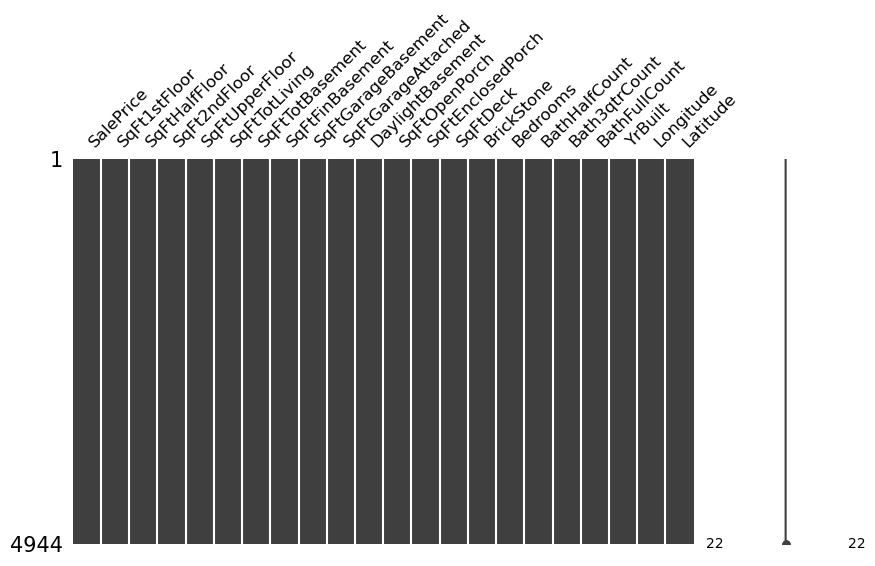

In [154]:
#visualize missing values
mn.matrix(df, figsize=(10,5), width_ratios=(5,1), fontsize=12)

In [155]:
duplicated_rows = df.duplicated().sum()
missing_values = df.isna().sum()

print(f'Number of duplicated rows: {duplicated_rows}')
print(f'\nNumber of missing values: \n{missing_values}')

Number of duplicated rows: 29

Number of missing values: 
SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64


In [156]:
statistics = df.describe()
print(f'\nStatistics: {statistics}')


Statistics:        SalePrice  SqFt1stFloor  SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  \
count    4944.00       4944.00        4944.00       4944.00         4944.00   
mean   664349.73       1175.50          51.76        349.31           26.99   
std    297808.04        446.40         174.46        544.63          115.33   
min     60000.00        260.00           0.00          0.00            0.00   
25%    450000.00        880.00           0.00          0.00            0.00   
50%    630550.00       1170.00           0.00          0.00            0.00   
75%    788612.50       1450.00           0.00        580.00            0.00   
max   1998000.00       3600.00        2000.00       3010.00         1220.00   

       SqFtTotLiving  SqFtTotBasement  SqFtFinBasement  SqFtGarageBasement  \
count        4944.00          4944.00          4944.00             4944.00   
mean         1935.21           595.07           334.27              102.42   
std           764.89           567.18    

In [157]:
def check_column_values(df):
    for column in df.columns:
        print(f'Unique Values in {column} column:')
        print(df[column].unique())
        print('\n')

check_column_values(df)

Unique Values in SalePrice column:
[ 400000  474250  667950 ...  934939  442000 1214950]


Unique Values in SqFt1stFloor column:
[1590 1390 1010  660 2310 1330 1420 1020 1120  770 1060 1730 1450  850
 1280 1110 1090 1820  980 1380 1130  500  360  430  730 1320 1710 1025
 1660 1500 1860  840 1650  960 1180 1230 1480 1430  920 2380  700  950
 1410 1140  900 1490  790  420 1560 1740 1300 1400 1053 1220 1100 1150
  690 1561 1250  810 1270 1210  880 1310  640 1030 1190  600 1050 1200
 1800  610  410  511  440 1840  800  830  890 1370  820 1260 1340 1711
  670  520 1640 1470 1080  984 1160  550 1780 2210  940 1040  990 1940
  910 2330 1920  570 1880 1670 1360 1610 2000 1690  390 1240 1350  710
 1680  860 1000 1193 1620 1580  590  780 1988  330 2790  540  400 1290
  580 1700 2010 1440 1540 1570 2110  480 2390  460 2580 2420 1170 2710
  930 1151 1070 1760 1720 1304 2260 2190 1930 2490 1179 1830  650 1890
  260 2360 1530  380  680  470  750 3030  870 1810  970 2120  620 1550
 1970  441 1900 151

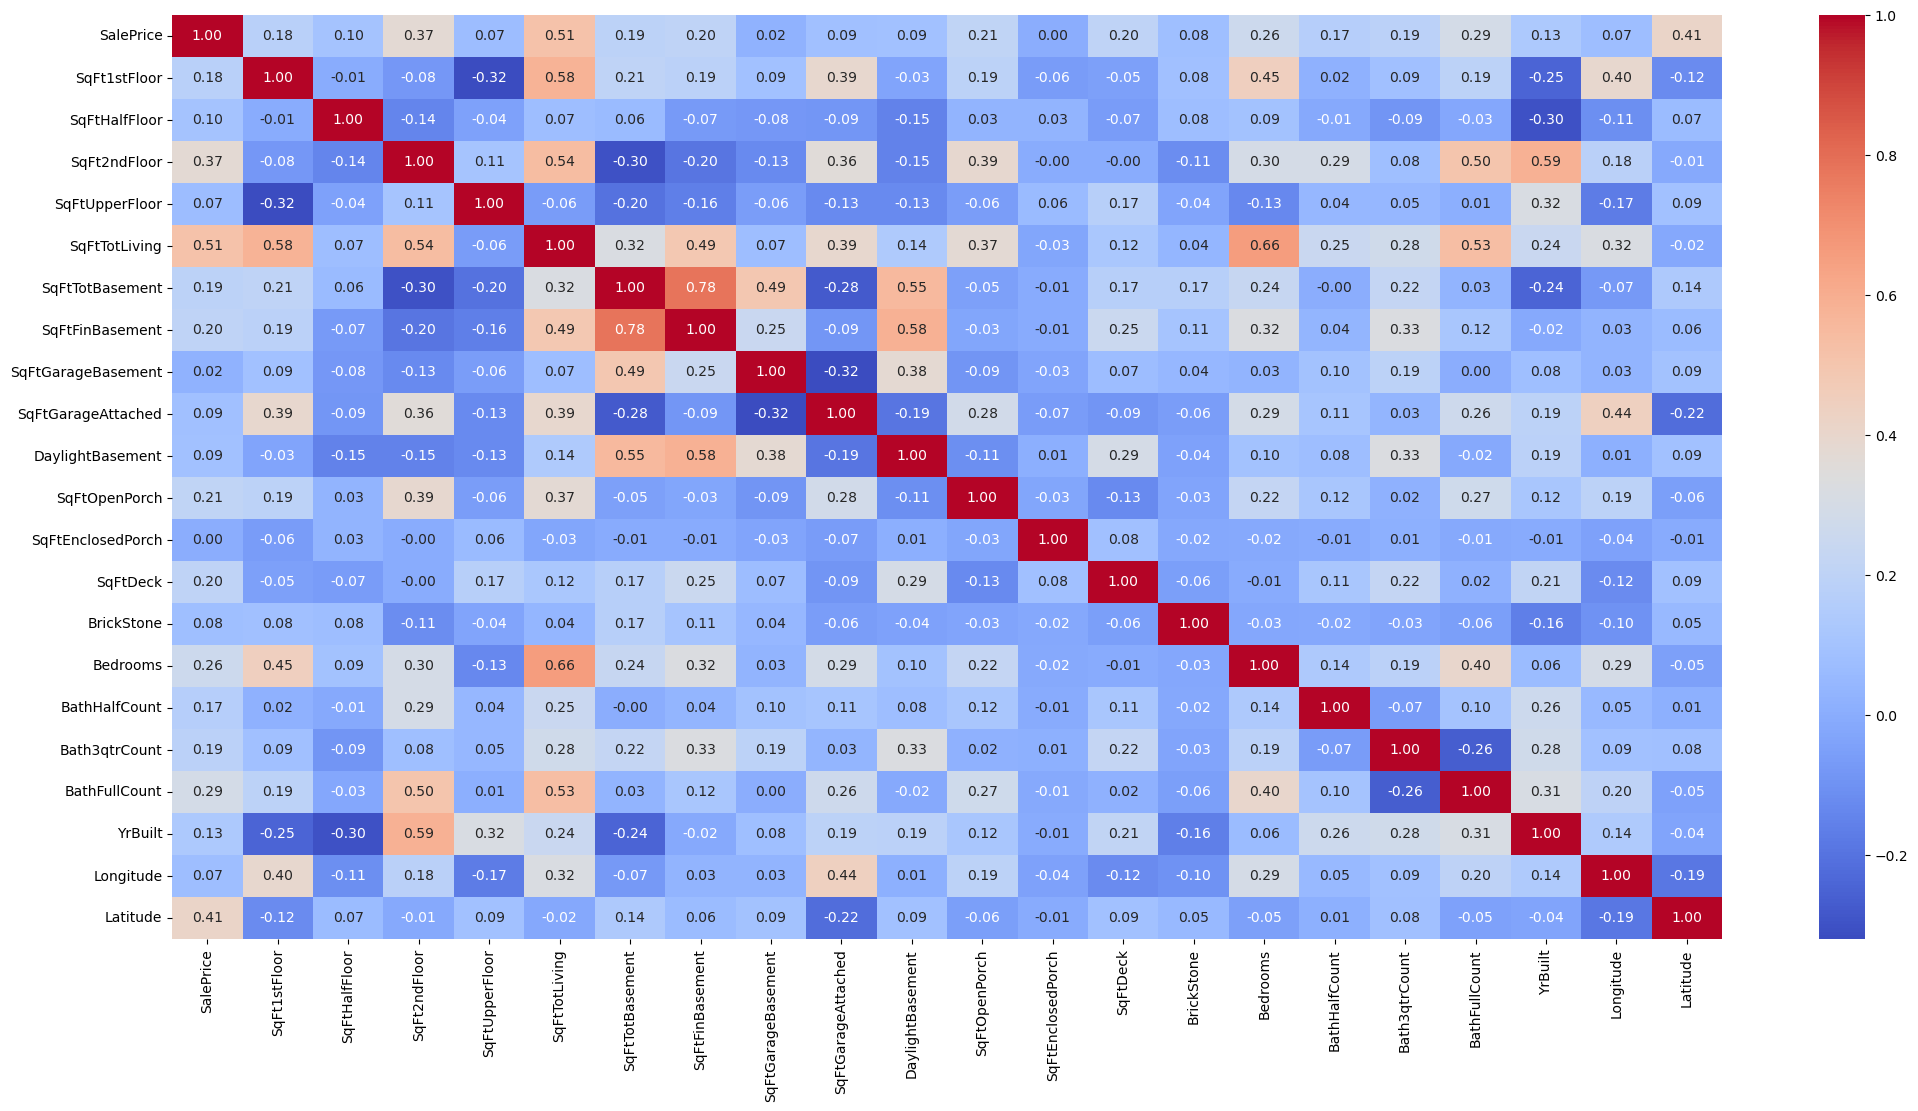

In [158]:
num_cols = df.select_dtypes(include='number')

corr = num_cols.corr()
plt.figure(figsize=(25, 12))  # Adjust the figsize to your preference

# Creating the heatmap
sn.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.show()

| Size of Correlation | Interpretation                        |
|---------------------|----------------------------------------|
| .90 to 1.00 (-.90 to -1.00) | Very high positive (negative) correlation |
| .70 to .90 (-.70 to -.90)   | High positive (negative) correlation      |
| .50 to .70 (-.50 to -.70)   | Moderate positive (negative) correlation  |
| .30 to .50 (-.30 to -.50)   | Low positive (negative) correlation       |
| .00 to .30 (.00 to -.30)    | Negligible correlation                    |


In [159]:
target_corr = corr['SalePrice'].sort_values(ascending=False)

# Display top 10 features
top_10_features = target_corr[1:11]  # Exclude 'SalePrice' itself
print(top_10_features)

SqFtTotLiving     0.51
Latitude          0.41
SqFt2ndFloor      0.37
BathFullCount     0.29
Bedrooms          0.26
SqFtOpenPorch     0.21
SqFtFinBasement   0.20
SqFtDeck          0.20
SqFtTotBasement   0.19
Bath3qtrCount     0.19
Name: SalePrice, dtype: float64


### Interpretation

1. **SqFtTotLiving (0.51):**
   - **Moderate positive correlation:** The total living space has a moderately strong relationship with sale price. As living space increases, sale price tends to increase.

2. **Latitude (0.42):**
   - **Low positive correlation:** Latitude has a weak positive relationship with sale price. As latitude increases, sale price tends to increase slightly.

3. **SqFt2ndFloor (0.37):**
   - **Low positive correlation:** The second floor's square footage has a weak positive relationship with sale price. As the second floor's size increases, sale price tends to increase slightly.


In [160]:
df.columns = [col.strip() for col in df.columns]

# check updated column names
print(df.columns)

# check updated column names
df = df.drop_duplicates()

# check for duplicates
print(f'\nnumber of duplicate rows: {df.duplicated().sum()}')

Index(['SalePrice', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'BrickStone',
       'Bedrooms', 'BathHalfCount', 'Bath3qtrCount', 'BathFullCount',
       'YrBuilt', 'Longitude', 'Latitude'],
      dtype='object')

number of duplicate rows: 0


# 2. Data Visualization

array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'SqFt1stFloor'}>,
        <Axes: title={'center': 'SqFtHalfFloor'}>,
        <Axes: title={'center': 'SqFt2ndFloor'}>,
        <Axes: title={'center': 'SqFtUpperFloor'}>],
       [<Axes: title={'center': 'SqFtTotLiving'}>,
        <Axes: title={'center': 'SqFtTotBasement'}>,
        <Axes: title={'center': 'SqFtFinBasement'}>,
        <Axes: title={'center': 'SqFtGarageBasement'}>,
        <Axes: title={'center': 'SqFtGarageAttached'}>],
       [<Axes: title={'center': 'DaylightBasement'}>,
        <Axes: title={'center': 'SqFtOpenPorch'}>,
        <Axes: title={'center': 'SqFtEnclosedPorch'}>,
        <Axes: title={'center': 'SqFtDeck'}>,
        <Axes: title={'center': 'BrickStone'}>],
       [<Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'BathHalfCount'}>,
        <Axes: title={'center': 'Bath3qtrCount'}>,
        <Axes: title={'center': 'BathFullCount'}>,
        <Axes: title={'ce

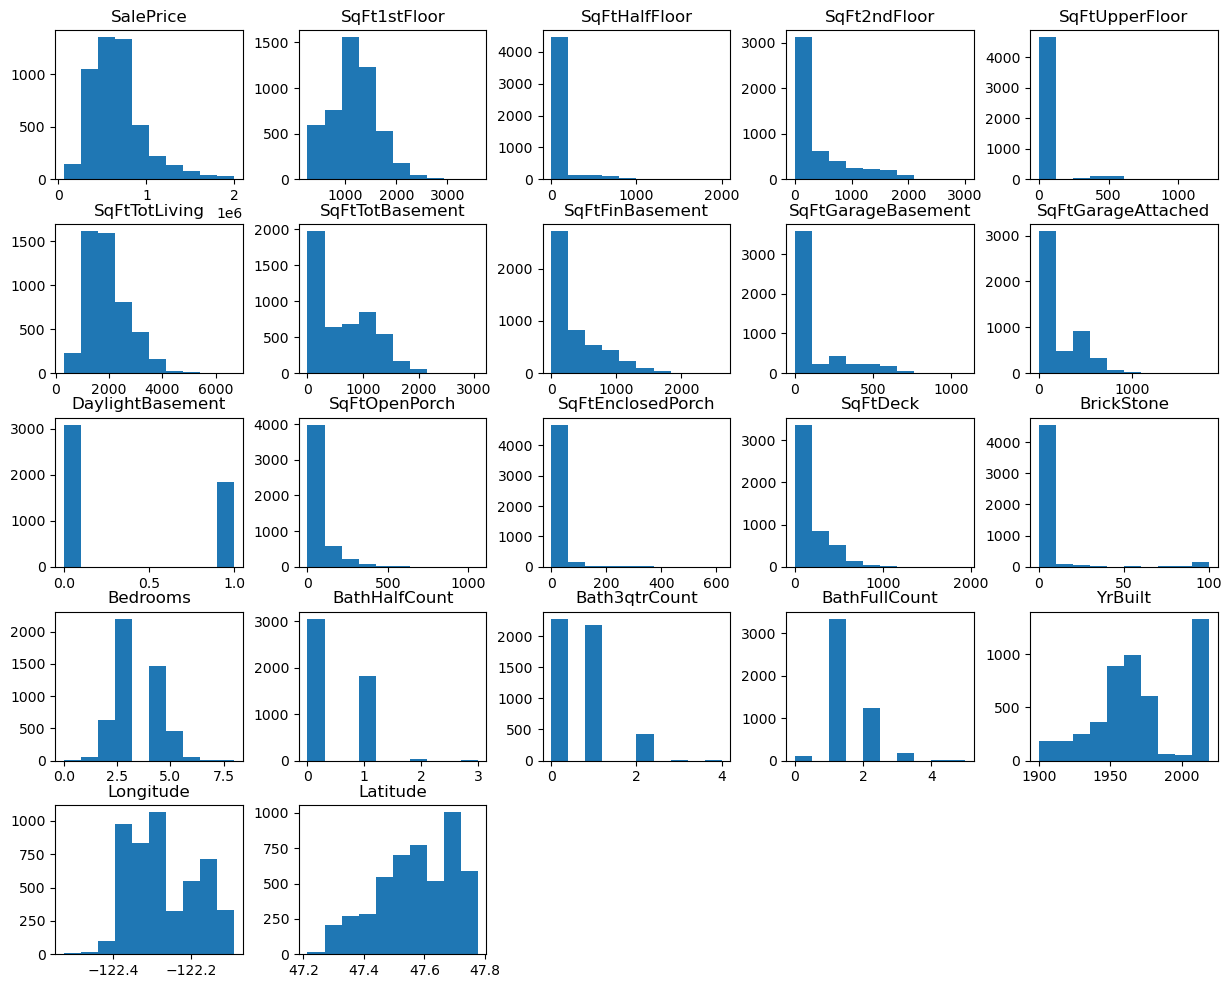

In [161]:
#Data Overview
df.hist(figsize=(15,12), bins=10, grid=False)

In [162]:
df.columns

Index(['SalePrice', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'BrickStone',
       'Bedrooms', 'BathHalfCount', 'Bath3qtrCount', 'BathFullCount',
       'YrBuilt', 'Longitude', 'Latitude'],
      dtype='object')

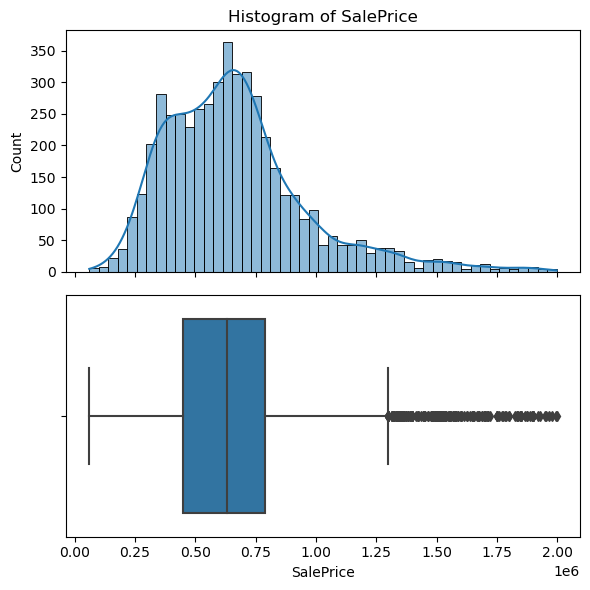

In [163]:
feature = 'SalePrice'

fig, axes = plt.subplots(nrows=2, figsize=(6,6), sharex=True)
sn.histplot(df[feature], bins='auto', kde=True, ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title(f'Histogram of {feature}')

sn.boxplot(data=df, x=feature, ax=axes[1])
#remove grids
axes[0].grid(False)
axes[1].grid(False)
plt.tight_layout()
plt.show()

### Observations
- The distribution of sale prices is right-skewed, meaning that most of the sale prices are concentrated on the lower end, with a long tail extending to the right.
- There is a peak around $500,000, indicating that this price range has the highest frequency of sales.
- The highest frequency of sale prices falls between $400,000 and $600,000, indicating that most houses are sold within this range.

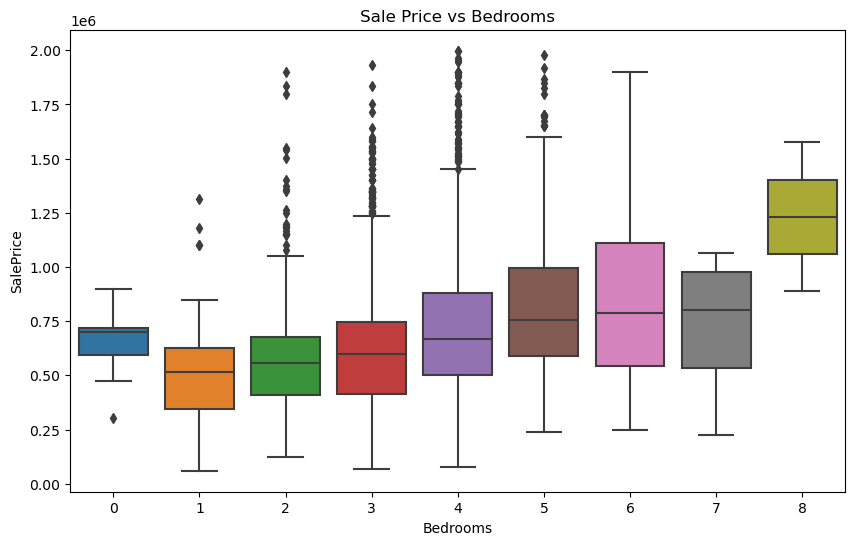

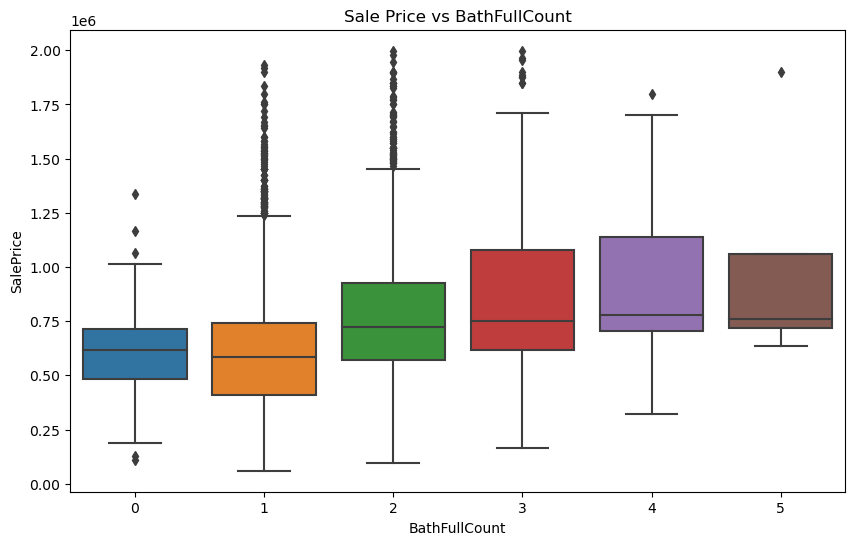

In [164]:
categorical_features = ['Bedrooms', 'BathFullCount',]
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sn.boxplot(x=df[feature], y=df['SalePrice'])
    plt.title(f'Sale Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

### Observations
*Sale Price vs Bedrooms*
- The highest median sale prices are seen in houses with 8 bedrooms, while the median prices for 5 and 6 bedrooms also tend to be higher.
- Houses with 4 bedrooms show a considerable number of outliers above the upper whisker, indicating some properties are much more expensive than others within this category.

*Sale Price vs Bathrooms*
- As the number of full bathrooms increases from 0 to 3, the sale prices increase notably.
- Houses with 5 full bathrooms have a high median price but a narrow range, suggesting they might be luxury properties with consistent pricing.

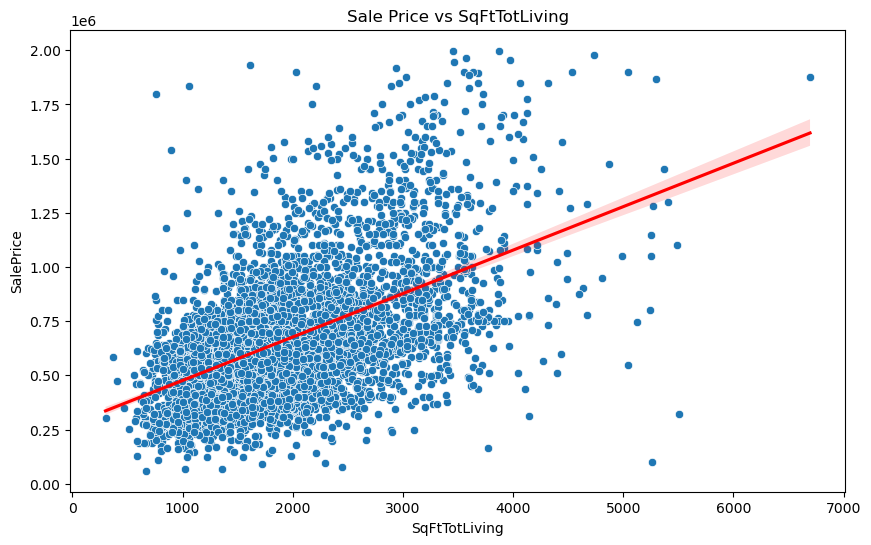

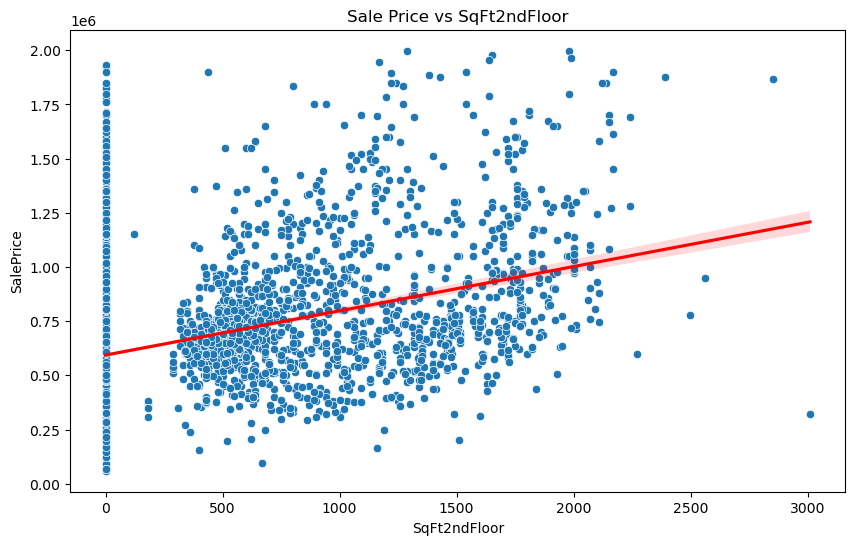

In [165]:


numerical_features = ['SqFtTotLiving', 'SqFt2ndFloor']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sn.scatterplot(x=df[feature], y=df['SalePrice'])
    sn.regplot(x=df[feature], y=df['SalePrice'], scatter=False, color='red')
    plt.title(f'Sale Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# Machine Learning


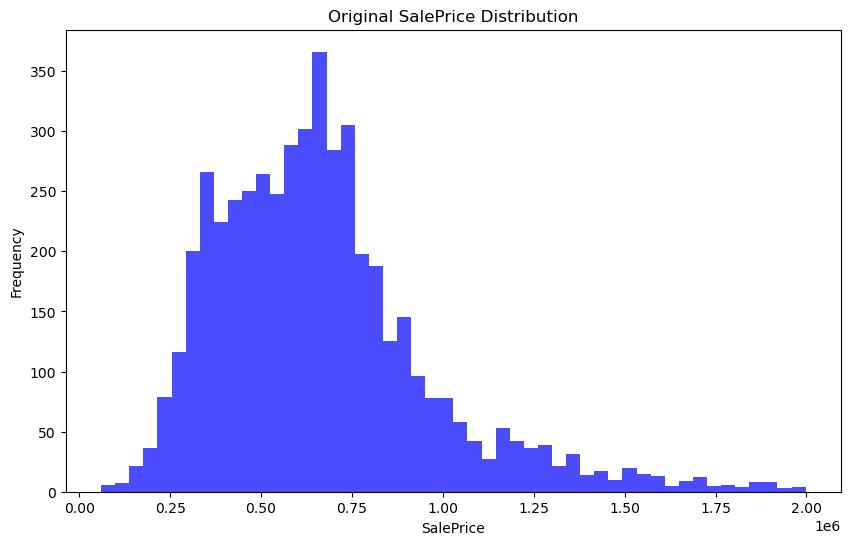

In [166]:
# Plot the original distribution of SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=50, color='blue', alpha=0.7)
plt.title('Original SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [167]:
# Split datab
y = df['SalePrice']
X = df.drop(['SalePrice'], axis=1)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
#Prepare the data by selecting all numberic and object columns
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')

#instantiate the transformers 
scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown='ignore')

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

#create pipelines
num_pipe = Pipeline([
    ('imputer', knn_imputer),
    ('scaler', scaler)
])

cat_pipe = Pipeline([
    ('encoder', ohe)
])

num_tuple = (num_pipe, num_cols)
cat_tuple = (cat_pipe, cat_cols)

#create ColumnTransformer
preprocessor = ColumnTransformer([
    ('numeric', num_pipe, num_cols),
    ('categorical', cat_pipe, cat_cols)
],remainder='drop')


In [170]:
# machine learning
# import libraries
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # define a function that takes true and predicted values as arguments
# and prints all 4 metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R²: {r2:.2f}')

In [171]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=100, random_state=42)

etr_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', etr),
    ])

#train the model
etr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CF3AEFBDC0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CF3CBD74C0>)])),
                ('regressor', ExtraTreesRegressor(random_state=42))])

In [172]:
print('Extra Trees Regression Model')
print('Train Evaluation')
evaluate_model(y_train, etr_pipe.predict(X_train))
print('\nTest Evaluation')
evaluate_model(y_test, etr_pipe.predict(X_test))
print("\n")

Extra Trees Regression Model
Train Evaluation
MAE: 359.36
MSE: 12648449.94
RMSE: 3556.47
R²: 1.00

Test Evaluation
MAE: 106756.46
MSE: 29290574346.58
RMSE: 171144.89
R²: 0.69




In [173]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', xgb),
    ])

#train the model
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CF3AEFBDC0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transform...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [174]:
print('XGBRegressor Model')
print('Train Evaluation')
evaluate_model(y_train, xgb_pipe.predict(X_train))
print('\nTest Evaluation')
evaluate_model(y_test, xgb_pipe.predict(X_test))
print("\n")

XGBRegressor Model
Train Evaluation
MAE: 30270.11
MSE: 1804531877.48
RMSE: 42479.78
R²: 0.98

Test Evaluation
MAE: 107673.04
MSE: 28506160583.75
RMSE: 168837.68
R²: 0.70




In [175]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()

en_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', en),
    ])

#train the model
en_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CF3AEFBDC0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CF3CBD74C0>)])),
                ('regressor', ElasticNet())])

In [176]:
print('Elastic Net Regression Model')
print('Train Evaluation')
evaluate_model(y_train, xgb_pipe.predict(X_train))
print('\nTest Evaluation')
evaluate_model(y_test, xgb_pipe.predict(X_test))
print("\n")

Elastic Net Regression Model
Train Evaluation
MAE: 30270.11
MSE: 1804531877.48
RMSE: 42479.78
R²: 0.98

Test Evaluation
MAE: 107673.04
MSE: 28506160583.75
RMSE: 168837.68
R²: 0.70




### Hyperparameter Tuning

In [177]:
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


In [178]:
# Define models for tuning
models = {
    'ExtraTree': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(),
    'ElasticNet': ElasticNet()
}

# Define the parameter grid
param_grid = {
    'ExtraTree': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    },
    
    'XGBoost': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    },
    
    'ElasticNet': {
        'regressor__alpha': [0.1, 1.0, 10.0],
        'regressor__l1_ratio': [0.1, 0.5, 0.9]
    }
}

In [179]:
# Create a loop function to train and evaluate models
metrics_list = []
best_models = {}

def train_and_evaluate_models(X_train, y_train, X_test, y_test, preprocessor):
    for model_name, model in tqdm(models.items(), desc='Training Models'):
        model_pipe = Pipeline(steps=[('regressor', model)])
        
        # Perform GridSearchCV
        grid_search = GridSearchCV(
            estimator=model_pipe,
            param_grid=param_grid[model_name],
            cv=5,
            n_jobs=-1,
            scoring='r2')
        
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        best_models[model_name] = best_model
        
        # Predictions
        train_pred = best_model.predict(X_train)
        test_pred = best_model.predict(X_test)
        
        # Evaluate classification models
        train_mse, train_rmse, train_mae, train_r2 = evaluate_regression(y_train, train_pred)
        test_mse, test_rmse, test_mae, test_r2 = evaluate_regression(y_test, test_pred)
        
        # Save metrics
        row = {
            'Model Used': model_name,
            'Training MSE': train_mse,
            'Training RMSE': train_rmse,
            'Training MAE': train_mae,
            'Training R²': train_r2,
            'Testing MSE': test_mse,
            'Testing RMSE': test_rmse,
            'Testing MAE': test_mae,
            'Testing R²': test_r2,
            'Best Params': grid_search.best_params_
        }
        metrics_list.append(row)

    # Convert the metrics into a Dataframe
    metrics_df = pd.DataFrame(metrics_list)
    return metrics_df, best_models

In [180]:
# Train and evaluate the tuned models
metrics_df, best_models = train_and_evaluate_models(X_train, y_train, X_test, y_test, preprocessor)
metrics_df

Training Models: 100%|██████████| 3/3 [00:57<00:00, 19.03s/it]


,Model Used,Training MSE,Training RMSE,Training MAE,Training R²,Testing MSE,Testing RMSE,Testing MAE,Testing R²,Best Params
0,ExtraTree,62209398.64,7887.29,4445.76,1.00,29304429479.82,171185.37,106410.46,0.69,"{'regressor__max_depth': 20, 'regressor__min_s..."
1,XGBoost,3877597083.69,62270.35,44377.06,0.96,25704186736.71,160325.25,102034.53,0.73,"{'regressor__learning_rate': 0.1, 'regressor__..."
2,ElasticNet,44783119592.18,211620.22,152660.77,0.49,52719121633.85,229606.45,161566.15,0.45,"{'regressor__alpha': 0.1, 'regressor__l1_ratio..."


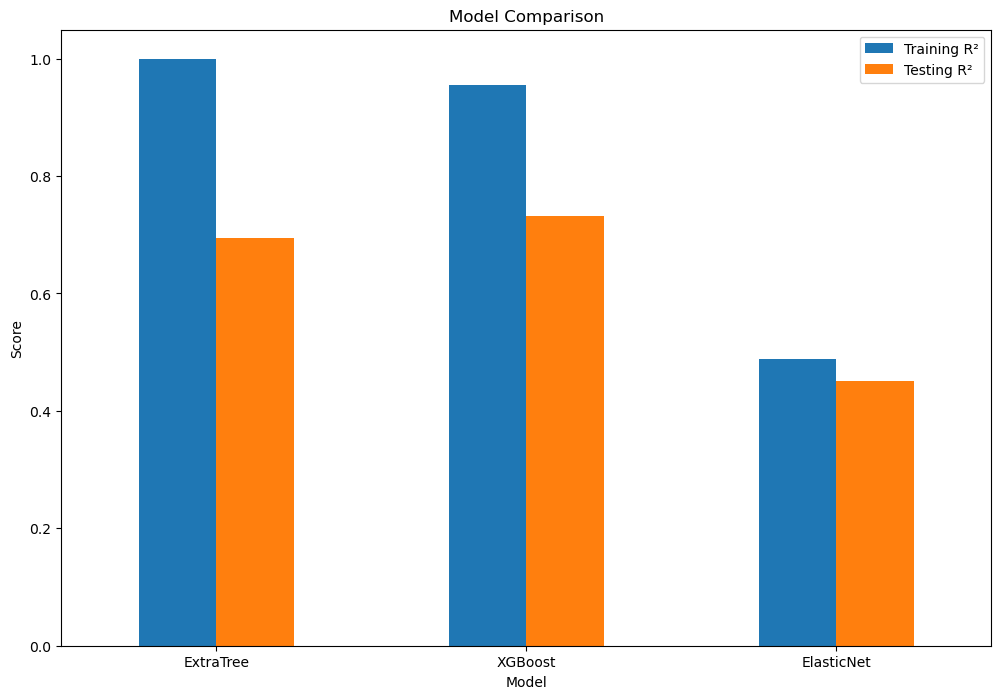

In [181]:
#create a function to displat the evaluation results
def display_evaluation_results(metrics_df):
    metrics_df.set_index('Model Used')[['Training R²', 'Testing R²']].plot(kind='bar', figsize=(12,8))

    plt.title('Model Comparison')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(loc='best')
    plt.show()

display_evaluation_results(metrics_df)

Learning CUrve for ExtraTree
Learning CUrve for XGBoost
Learning CUrve for ElasticNet


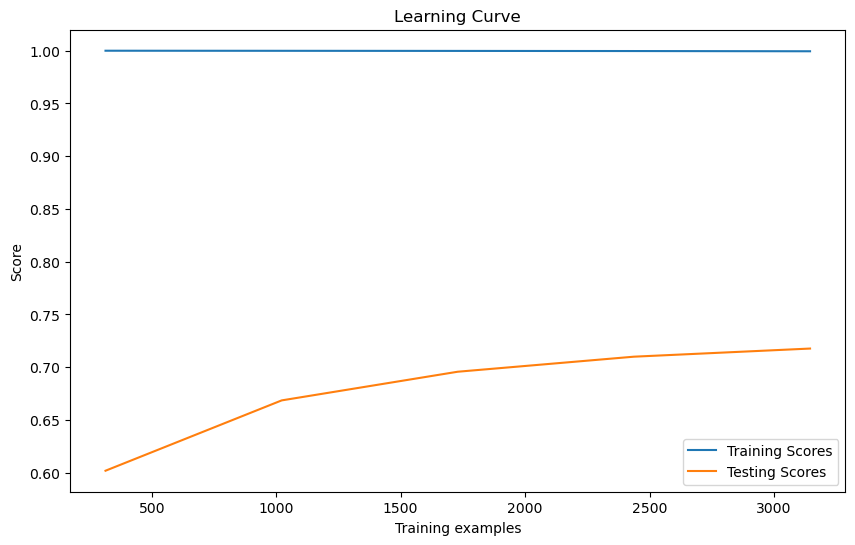

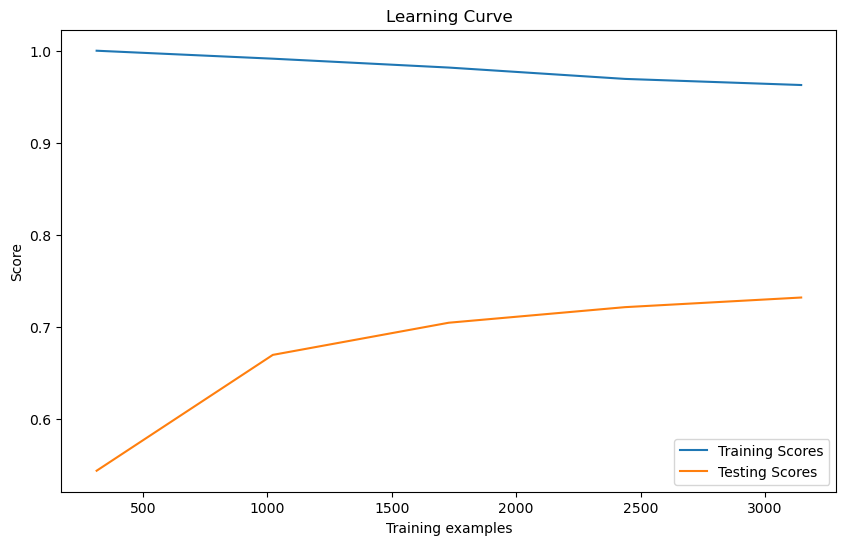

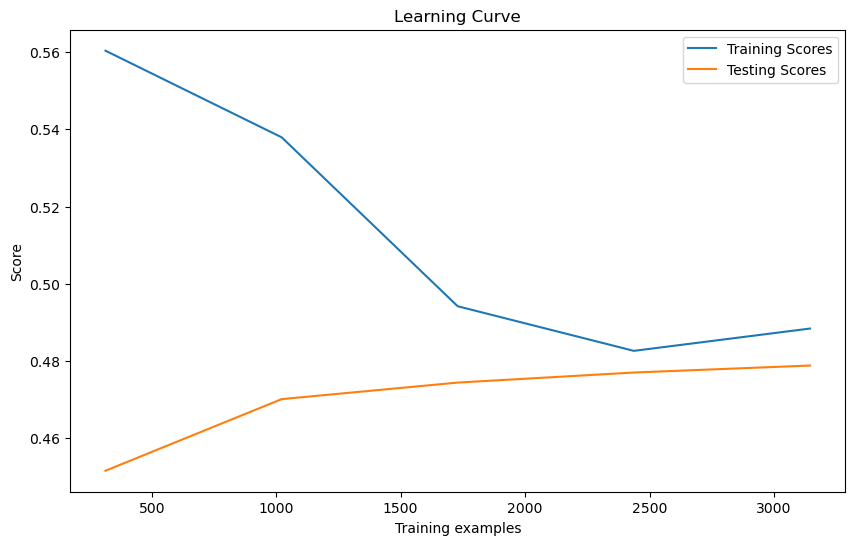

In [182]:
#Plot the learning curves
def plot_learning_curve(estimator, X, y, cv=5, n_jobs=None, train_sizes = np.linspace(0.1, 1.0, 5), scoring='r2'):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, train_scores_mean, label='Training Scores')
    plt.plot(train_sizes, test_scores_mean, label='Testing Scores')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(False)
    plt.show

    

#call the learning curve function for each model
for model_name, best_model in best_models.items():
    print(f'Learning CUrve for {model_name}')
    plot_learning_curve(best_model, X_train, y_train)

### Feature Importance

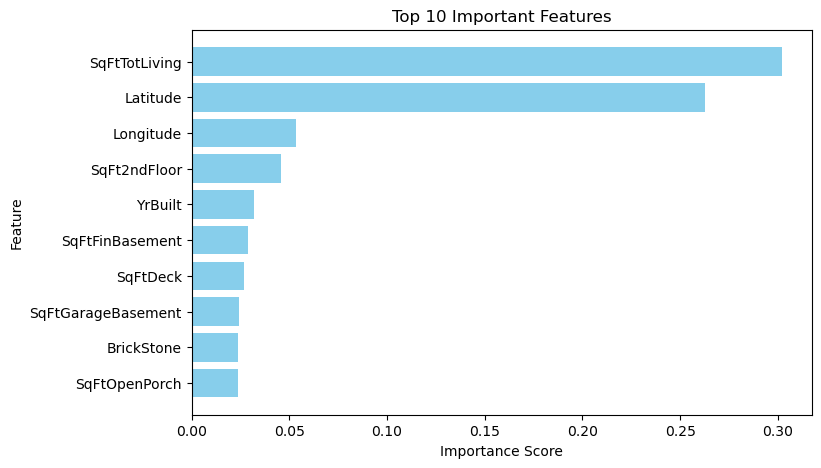

               Feature  Importance
4        SqFtTotLiving        0.30
20            Latitude        0.26
19           Longitude        0.05
2         SqFt2ndFloor        0.05
18             YrBuilt        0.03
6      SqFtFinBasement        0.03
12            SqFtDeck        0.03
7   SqFtGarageBasement        0.02
13          BrickStone        0.02
10       SqFtOpenPorch        0.02


In [183]:
if 'XGBoost' in best_models:
    xgb_model = best_models['XGBoost'].named_steps['regressor']
    importances = xgb_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    top_10_features = feature_importance_df.head(10)

    plt.figure(figsize=(8, 5))
    plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Top 10 Important Features')
    plt.gca().invert_yaxis()
    plt.show()

    print(top_10_features)
else:
    print("Decision Tree model not found in best models.")

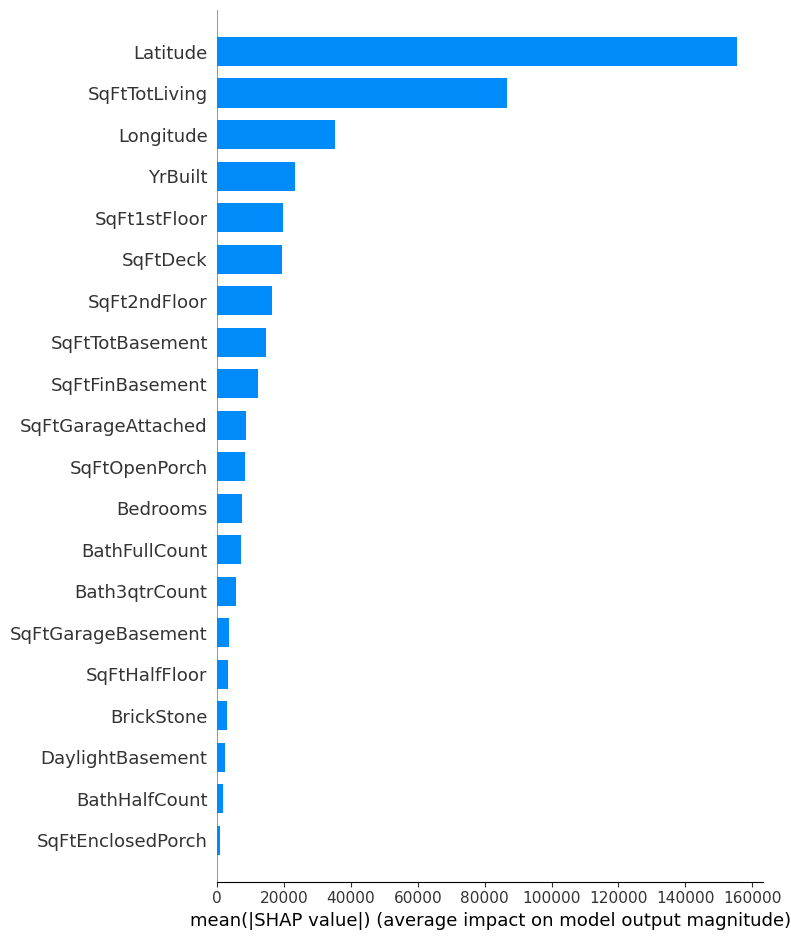

In [184]:
# Train a regression model (e.g., RandomForestRegressor)
model = xgb
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

# 3. Silhouettes & Inertia

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clustering and Dimensionality Reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Deep Learning
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from keras_tuner import HyperParameters as hp

# Metrics
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    silhouette_score
)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.metrics import Recall, Precision

# Progress bars
from tqdm import tqdm, trange
from tqdm.keras import TqdmCallback

#utilities
import pickle
import os

In [186]:
file_path2 = 'data/housing.csv'

df2 = pd.read_csv(file_path2)

df2_copy = df2.copy()

def scale_features(df2):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df2)
    scaled_df2 = pd.DataFrame(scaled_data, columns = df2.columns)
    return scaled_df2



In [187]:
df2.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.20,47.34
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.36,47.51
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.16,47.44
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.37,47.57
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.18,47.73


In [188]:
def calculate_kmeans_score(scaled_df2, k_range):
    
    inertias = []
    silhouettes = []
    
    for k in trange(k_range.start, k_range.stop): # trange adds a progress bar using tqdm
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
        kmeans.fit(scaled_df2)
        
        inertias.append(kmeans.inertia_)
        
        # Ensure silhouette score calculation is correct
        if len(set(kmeans.labels_)) > 1: # at least 2 clusters
            silhouettes.append(silhouette_score(scaled_df2, kmeans.labels_))
        else:
            silhouettes.append(float('nan'))
            
    return inertias, silhouettes

In [189]:
import matplotlib.figure as figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def plot_kmeans_scores(k_range, inertias, silhouettes):
    # Create a figure and axis
    fig = figure.Figure(figsize=(15, 6))
    canvas = FigureCanvas(fig)

    # Create subplots
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    # Plot Inertia scores
    ax1.plot(k_range, inertias, marker='o', linestyle='-', color='blue')
    ax1.set_title('Inertia Scores')
    ax1.set_xlabel('Number of Clusters (K)')
    ax1.set_ylabel('Inertia')

    # Plot Silhouette scores
    ax2.plot(k_range, silhouettes, marker='o', linestyle='-', color='red')
    ax2.set_title('Silhouette Scores')
    ax2.set_xlabel('Number of Clusters (K)')
    ax2.set_ylabel('Silhouette')

    fig.suptitle('KMeans Clustering Scores')

    # Save the plot to a file if needed or display it
    canvas.draw()

    # To display the figure, we can convert it to an image or save it to a file.
    # Here we display it inline
    import IPython.display as display
    display.display(fig)

100%|██████████| 8/8 [00:04<00:00,  1.97it/s]


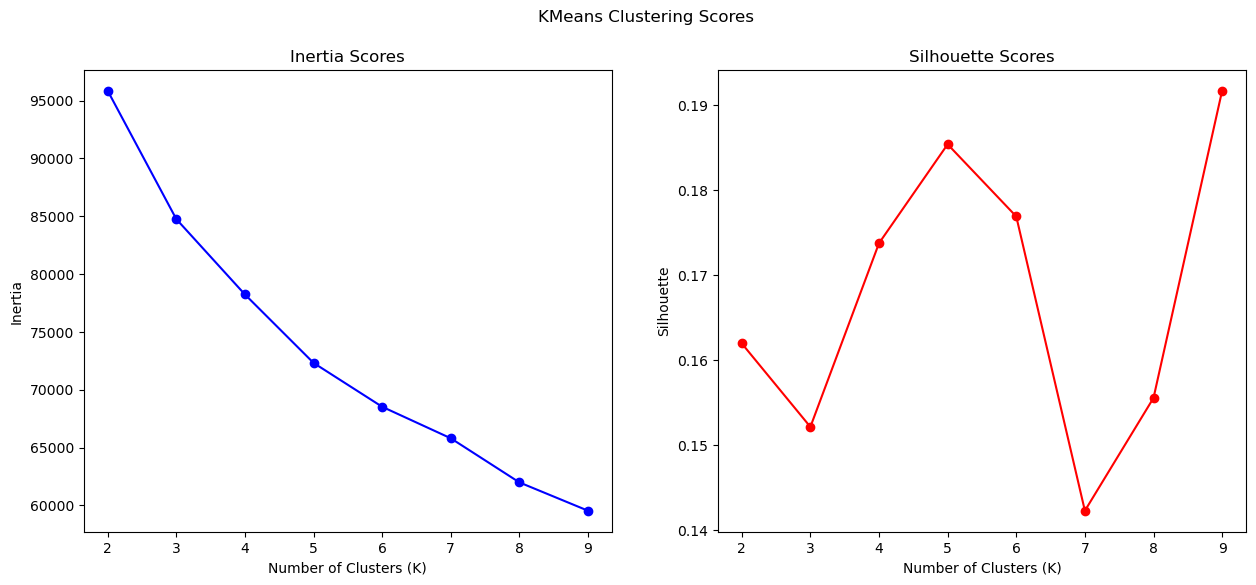

In [190]:
scaled_df2_copy = scale_features(df2_copy)

# Define k_range
k_range = range(2, 10)

# Calculate KMeans scores using the scaled copy of the dataframe
inertias, silhouettes = calculate_kmeans_score(scaled_df2_copy, k_range)

# Plot the scores using Plotly
plot_kmeans_scores(k_range, inertias, silhouettes)

### Interpretation of KMeans Clustering Scores
- *Inertia Scores*: Show a decreasing trend with increasing K, as expected. The steep decline up to K=4 or K=5 indicates that these values could be optimal.
- *Silhouette Scores*: Peaks at K=5 and K=9 suggest that these numbers of clusters provide the best-defined clusters. A significant drop at K=7 indicates poor clustering quality.

*Conclusion*
- Considering both inertia and silhouette scores, ``K=5`` seems to be a strong candidate for the optimal number of clusters, as it balances low inertia and high silhouette scores.

# 4. Clustering

In [191]:
def fit_kmeans_and_label_clusters(df2, scaled_df, n_clusters=5, n_init=10):
    #create copy of the original df to preserve integrity
    df2_copy = df2.copy()

    #fit the final model with the specified number of clusters
    kmean_final = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
    kmean_final.fit(scaled_df)

    df2_copy['Cluster'] = kmean_final.labels_
    cluster_descriptions = df2_copy.groupby('Cluster').mean()
    
    return cluster_descriptions

In [192]:
#fit kmeans and label clusters
cluster_descriptions = fit_kmeans_and_label_clusters(df2, scaled_df2_copy)
cluster_descriptions

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
Cluster,,,,,,,,,,,,,,,,,,,,,
0,800569.38,1308.39,129.22,104.51,10.31,2074.66,1030.47,523.94,135.23,89.59,...,4.77,98.39,92.98,3.22,0.35,0.52,1.18,1947.64,-122.31,47.61
1,697329.68,559.87,6.76,555.49,146.74,1531.81,374.72,267.07,103.23,10.36,...,16.10,297.75,0.00,2.75,0.53,0.91,1.24,2015.96,-122.33,47.62
2,529801.87,1199.17,92.03,67.54,0.00,1435.00,346.77,80.80,25.97,159.11,...,7.88,67.28,0.84,3.03,0.21,0.29,1.10,1947.47,-122.28,47.55
3,700837.24,1411.69,24.28,82.74,0.00,2323.93,1228.91,805.37,243.72,138.65,...,6.05,206.61,1.55,3.83,0.40,0.94,1.32,1965.34,-122.25,47.58
4,870959.46,1372.70,30.67,1400.64,9.24,2959.10,207.03,146.59,28.69,471.03,...,5.04,90.29,0.36,4.23,0.67,0.63,2.05,2003.76,-122.20,47.55


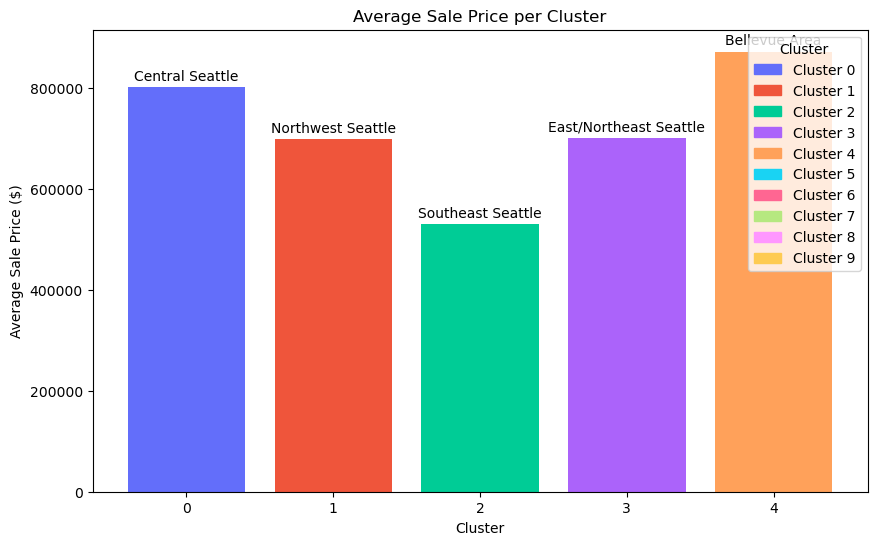

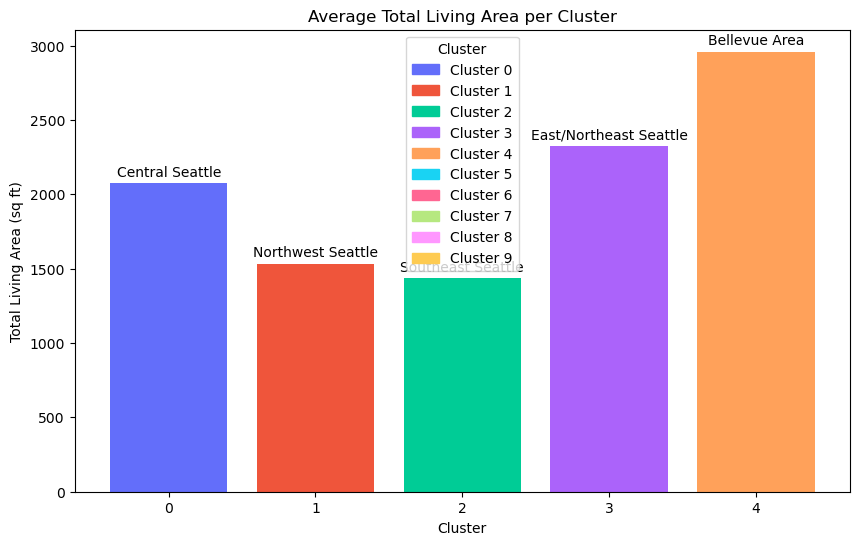

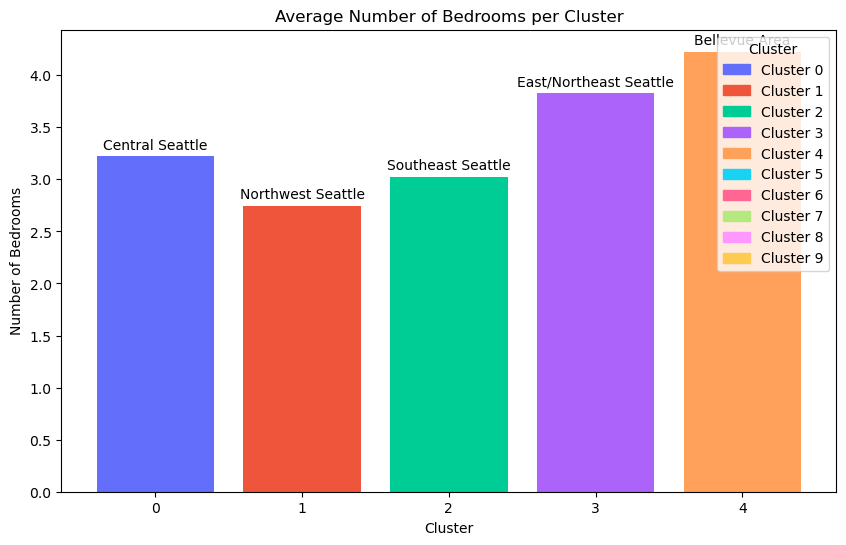

In [248]:
import matplotlib.patches as mpatches

def visualize_clusters_matplotlib(cluster_descriptions, column, title, ylabel, colors, annotations):
    # Create a figure and axis
    fig = figure.Figure(figsize=(10, 6))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)

    # Extract data for plotting
    clusters = cluster_descriptions.index
    values = cluster_descriptions[column]
    
    # Create a bar plot
    bars = ax.bar(clusters, values, color=colors, tick_label=clusters)
    
    # Add annotations
    for bar, cluster in zip(bars, clusters):
        height = bar.get_height()
        annotation = annotations.get(cluster, "")
        ax.annotate(annotation, xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

    # Set title and labels
    ax.set_title(title)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(ylabel)

    # Customize legend if needed
    legend_patches = [mpatches.Patch(color=colors[i], label=f'Cluster {i}') for i in range(len(colors))]
    ax.legend(handles=legend_patches, title='Cluster')

    # Save the plot to a file if needed or display it
    canvas.draw()

    # To display the figure, we can convert it to an image or save it to a file.
    # Here we display it inline
    import IPython.display as display
    display.display(fig)

    
# Cluster descriptions
annotations = {
    0: "Central Seattle",
    1: "Northwest Seattle",
    2: "Southeast Seattle",
    3: "East/Northeast Seattle",
    4: "Bellevue Area"
}

#visualize Sale Price
visualize_clusters_matplotlib(
    cluster_descriptions=cluster_descriptions,
    column='SalePrice',
    title='Average Sale Price per Cluster',
    ylabel='Average Sale Price ($)',
    colors=px.colors.qualitative.Plotly,
    annotations=annotations
)

#visualize total living are
visualize_clusters_matplotlib(
    cluster_descriptions=cluster_descriptions,
    column='SqFtTotLiving',
    title='Average Total Living Area per Cluster',
    ylabel='Total Living Area (sq ft)',
    colors=px.colors.qualitative.Plotly,
    annotations=annotations
)

# Visualize Number of Bedrooms
visualize_clusters_matplotlib(
    cluster_descriptions=cluster_descriptions,
    column='Bedrooms',
    title="Average Number of Bedrooms per Cluster",
    ylabel="Number of Bedrooms",
    colors=px.colors.qualitative.Plotly,
    annotations=annotations
)


In [194]:
import folium

# Define cluster centers with their average longitude and latitude
cluster_centers = {
    'Cluster 0': {'Longitude': -122.31, 'Latitude': 47.61},
    'Cluster 1': {'Longitude': -122.33, 'Latitude': 47.62},
    'Cluster 2': {'Longitude': -122.28, 'Latitude': 47.55},
    'Cluster 3': {'Longitude': -122.25, 'Latitude': 47.58},
    'Cluster 4': {'Longitude': -122.20, 'Latitude': 47.55}
}

# Create a map centered around Seattle
map_seattle = folium.Map(location=[47.60, -122.33], zoom_start=10)

# Add cluster centers to the map
for cluster, coords in cluster_centers.items():
    folium.Marker(
        location=[coords['Latitude'], coords['Longitude']],
        popup=cluster,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_seattle)

# Display the map
map_seattle

# PCA (Dimensionality Reduction)

In [195]:
# Data Validation

#identify target y and features x for modeling
y=df2['SalePrice']
X=df2.drop(columns=['SalePrice'])

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [196]:
#create a function to scale and plot PCa
def scale_plot_pca(X_train, X_test, n_components=None):
    scaler = StandardScaler()

    # Scale the dataset
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Instantiate and fit the PCA model
    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)

    # Plot the explained variance ratio for each principal component
    fig = figure.Figure(figsize=(10, 6))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)

    ax.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='blue')

    # Set title and labels
    ax.set_title('Explained Variance by Principal Component')
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_xticks(range(1, len(pca.explained_variance_ratio_) + 1))
    ax.set_ylim(0, max(pca.explained_variance_ratio_) * 1.1)

    # Display the plot inline
    import IPython.display as display
    canvas.draw()
    display.display(fig)
    
    return X_train_scaled, X_test_scaled, pca

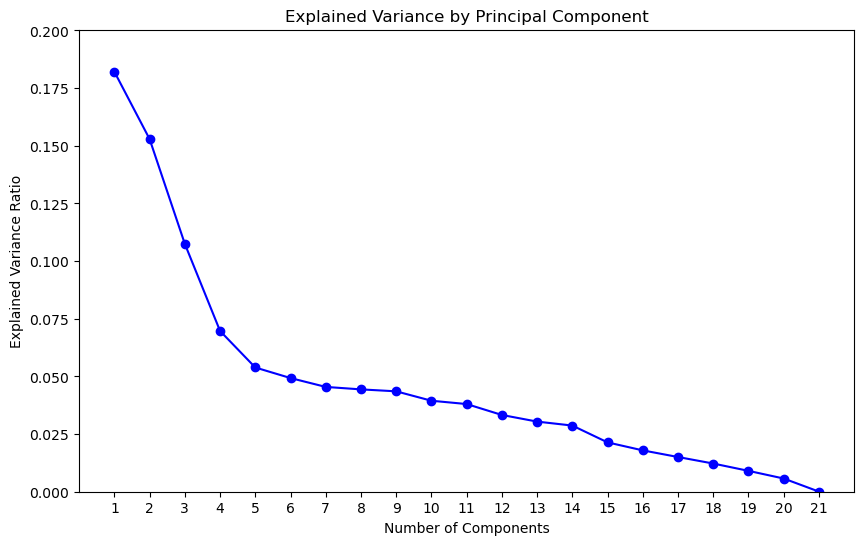

In [197]:
# call the function
X_train_scaled, X_test_scaled, pca_model = scale_plot_pca(X_train, X_test)

### Interpretation 
- ``First Few Components``: The first 3-4 components explain a substantial amount of the variance, roughly 50% in total.
- ``Diminishing Returns``: After the first few components, each additional component explains progressively less variance. By the time we reach the 10th component, each new component explains less than 5% of the variance.
- ``Elbow Point``: There is an "elbow" in the plot around the 3rd or 4th component, indicating that adding more components beyond this point results in a smaller increase in explained variance. This is often used as a heuristic to select the number of components to keep.


In [198]:
#cumulative explained variance
def cumulative_explained_variance(pca, threshold=0.90):
    # Calculate cumulative explained variance ratio
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # Determine number of components for a given threshold
    optimal_components = np.argmax(cumulative_explained_variance >= threshold) + 1

    # Create a figure and axis
    fig = figure.Figure(figsize=(10, 6))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)

    # Plot cumulative explained variance
    ax.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='blue')

    # Add threshold line
    ax.axhline(y=threshold, color='red', linestyle='--')
    ax.text(len(cumulative_explained_variance), threshold, f'{int(threshold * 100)}% threshold', color='red', ha='right', va='bottom')

    # Set title and labels
    ax.set_title('Cumulative Explained Variance by Principal Components')
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Cumulative Explained Variance')
    ax.set_ylim(0, 1.05)

    # Display the plot inline
    import IPython.display as display
    canvas.draw()
    display.display(fig)

    # Print the number of optimal components
    print(f'Number of components for {int(threshold * 100)}% explained variance: {optimal_components}')

          
    return optimal_components

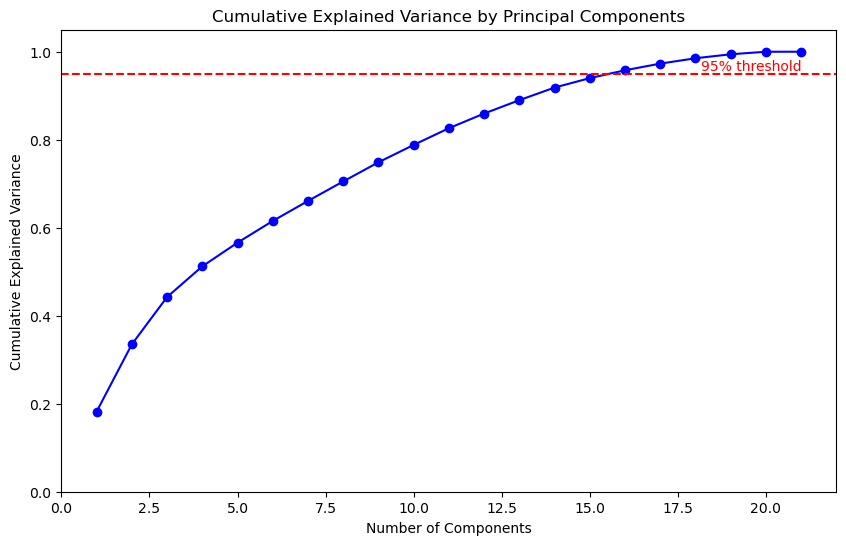

Number of components for 95% explained variance: 16


In [199]:
pca = PCA().fit(X_train_scaled)
optimal_components = cumulative_explained_variance(pca, threshold=0.95)

# 5. Deep Learning

In [200]:
def extract_nn_config(model):
    layers_info = []
    if "Sequential" in str(model):  # Handle Sequential models without input layer
        first_layer= model.layers[0]
        layers_info.append({
            "name": "input",
            "in": int(first_layer.input.shape[-1]),
            "neurons": 0,
            "out": int(first_layer.input.shape[-1]),
            "activation": None,
            "params": 0,
            "bias": 0
        })
    for layer in model.layers:
        try:
            layer_info={
                "name": layer.name,
                "in": int(layer.input.shape[-1]),
                "neurons": getattr(layer, 'units', 0),
                "out": int(layer.output.shape[-1]),
                "activation": layer.get_config().get("activation", None),
                "params": layer.count_params(),
                "bias": layer.get_weights()[1].shape[0] if layer.get_weights() else 0
            }
        except:
            layer_info={
                "name": layer.name,
                "in": int(layer.input.shape[-1]),
                "neurons": 0,
                "out": int(layer.output.shape[-1]),
                "activation": None,
                "params": 0,
                "bias": 0
            }
        layers_info.append(layer_info)
    return layers_info

def visualize_nn(model, description=False, figsize=(10, 8)):
    layers_info = extract_nn_config(model)
    layer_sizes = [layer["out"] for layer in layers_info]

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right - left) / (len(layer_sizes) - 1)
    y_space = (top - bottom) / max(layer_sizes)
    p = 0.025

    for i, size in enumerate(layer_sizes):
        top_on_layer = y_space * (size - 1) / 2 + (top + bottom) / 2
        color = "red" if (layers_info[i]['neurons'] == 0) and (i > 0) else "blue" if i not in [0, len(layer_sizes) - 1] else "green"
        
        if description:
            plt.text(left + i * x_space, top, layers_info[i]["name"].upper(), fontsize=10, color=color)
            if layers_info[i]['activation']:
                plt.text(left + i * x_space, top - p, layers_info[i]['activation'], fontsize=10, color=color)
                plt.text(left + i * x_space, top - 2 * p, f"Σ{layers_info[i]['in']}[X*w]+b", fontsize=10, color=color)
                plt.text(left + i * x_space, top - 3 * p, f") = {layers_info[i]['neurons']} {'Y' if i == len(layer_sizes) - 1 else 'out'}", fontsize=10, color=color)

        for j in range(size):
            circle = plt.Circle((left + i * x_space, top_on_layer - j * y_space), radius=y_space / 4, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            if i == 0:
                plt.text(left - 4 * p, top_on_layer - j * y_space, f'$X_{{{j + 1}}}$', fontsize=10)
            elif i == len(layer_sizes) - 1:
                plt.text(right + 4 * p, top_on_layer - j * y_space, f'$y_{{{j + 1}}}$', fontsize=10)
            else:
                plt.text(left + i * x_space + p, top_on_layer - j * y_space + y_space / 8, f'$H_{{{j + 1}}}$', fontsize=10)

    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = layers_info[i + 1]
        color = "red" if layer['neurons'] == 0 else "blue" if i != len(layer_sizes) - 2 else "green"
        layer_top_a = y_space * (n_a - 1) / 2 + (top + bottom) / 2
        layer_top_b = y_space * (n_b - 1) / 2 + (top + bottom) / 2
        for m in range(n_a):
            for n in range(n_b):
                line = plt.Line2D([i * x_space + left, (i + 1) * x_space + left], [layer_top_a - m * y_space, layer_top_b - n * y_space], c=color, alpha=0.5)
                ax.add_artist(line)
    
    plt.show()

In [201]:
import matplotlib.figure as figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.pyplot as plt

def plot_history(history, metric=None):
    # Create a figure and axis
    fig = figure.Figure(figsize=(15, 6))
    canvas = FigureCanvas(fig)

    # Create subplots
    ax1 = fig.add_subplot(121)
    ax1.plot(range(len(history.history['loss'])), history.history['loss'], marker='o', linestyle='-', color='blue', label='train_loss')
    ax1.plot(range(len(history.history['val_loss'])), history.history['val_loss'], marker='o', linestyle='-', color='red', label='val_loss')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    if metric:
        ax2 = fig.add_subplot(122)
        ax2.plot(range(len(history.history[metric])), history.history[metric], marker='o', linestyle='-', color='green', label=f'train_{metric}')
        ax2.plot(range(len(history.history[f'val_{metric}'])), history.history[f'val_{metric}'], marker='o', linestyle='-', color='orange', label=f'val_{metric}')
        ax2.set_title(metric.capitalize())
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel(metric.capitalize())
        ax2.legend()

    fig.suptitle('Model Training History')

    # Display the plot inline
    import IPython.display as display
    canvas.draw()
    display.display(fig)



In [202]:
# Create predictions on the test set for comparison
def evaluate_model(model, X_train_pca, y_train, X_test_pca, y_test):

    # Create predictions on the training set for comparison
    train_preds = np.rint(model.predict(X_train_pca))

    # Create predictions on the test set
    test_preds = np.rint(model.predict(X_test_pca))

    # Calculate metrics for the training set
    train_mae = mean_absolute_error(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_preds)

    # Calculate metrics for the test set
    test_mae = mean_absolute_error(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_preds)

   # Print the metrics
    print("Training Set Metrics:")
    print(f"Mean Absolute Error (MAE): {train_mae}")
    print(f"Mean Squared Error (MSE): {train_mse}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse}")
    print(f"R-squared (R²): {train_r2}")

    print("\nTest Set Metrics:")
    print(f"Mean Absolute Error (MAE): {test_mae}")
    print(f"Mean Squared Error (MSE): {test_mse}")
    print(f"Root Mean Squared Error (RMSE): {test_rmse}")
    print(f"R-squared (R²): {test_r2}")

    # Plotting the actual vs predicted values for the test set
    plt.figure(figsize=(14, 6))

    # Scatter plot of actual vs predicted values
    plt.scatter(y_test, test_preds, alpha=0.6, color='b')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")

    plt.show()

    return {
        "train_mae": train_mae,
        "train_mse": train_mse,
        "train_rmse": train_rmse,
        "train_r2": train_r2,
        "test_mae": test_mae,
        "test_mse": test_mse,
        "test_rmse": test_rmse,
        "test_r2": test_r2
    }

In [203]:
# Apply PCA to X_train_scaled and X_test_scaled
pca_variance = PCA(n_components=16)  # using only 70% of variance, testing over this will result in an overfit model

X_train_pca = pca_variance.fit_transform(X_train_scaled)
X_test_pca = pca_variance.transform(X_test_scaled)

In [204]:


def build_basic_model(input_dim, first_layer_neurons):
    # Validate input parameters
    if first_layer_neurons <= 0:
        raise ValueError("Number of neurons must be positive.")
    
    # Instantiate Model 
    model = Sequential([
        Dense(first_layer_neurons, input_dim=input_dim, activation='relu'),
        Dense(1, activation='linear')  # Use 'linear' activation for regression output
    ])
    
    # Compile Model
    model.compile(
        loss='mean_squared_error',  # Use mean squared error for regression
        optimizer='adam',  # Adam optimizer is suitable for regression tasks too
        metrics=['mean_absolute_error', 'mean_squared_error', 'mean_squared_logarithmic_error']
    )
    
    # Display model summary
    model.summary()
    
    # Optionally, visualize the neural network structure
    # visualize_nn(model, description=True, figsize=(13,10)) # Uncomment this to display the neural network
    
    return model

### Model 1

In [205]:
# Define input neurons
input_dimension = X_train_pca.shape[1]  # Assuming X_train_pca is defined elsewhere

# Build and compile the basic model
basic_model = build_basic_model(input_dimension, first_layer_neurons=15)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                255       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [206]:
def train_model(model, X_train, X_test, epochs, batch_size):
    history = model.fit(
        X_train_pca, y_train, # Input features and target variable
        epochs=epochs,            # Number of epochs to train the model
        batch_size=batch_size,        # Size of each batch during training
        validation_data=(X_test_pca, y_test), # Validation data for monitoring performance during training
        callbacks=[TqdmCallback(verbose=1)] # Using tqdm callback for progress bar
    )
    
    return history

In [207]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [208]:

history = train_model(basic_model, X_train_pca, X_test_pca, epochs=50, batch_size=32)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
116/116 [==============================] - 1s 3ms/step - loss: 528076767232.0000 - mean_absolute_error: 662334.1875 - mean_squared_error: 528076767232.0000 - mean_squared_logarithmic_error: 159.7066 - val_loss: 535891410944.0000 - val_mean_absolute_error: 670391.1250 - val_mean_squared_error: 535891410944.0000 - val_mean_squared_logarithmic_error: 151.4065
Epoch 2/50
116/116 [==============================] - 0s 1ms/step - loss: 528074244096.0000 - mean_absolute_error: 662332.3125 - mean_squared_error: 528074244096.0000 - mean_squared_logarithmic_error: 144.0782 - val_loss: 535888658432.0000 - val_mean_absolute_error: 670389.1250 - val_mean_squared_error: 535888658432.0000 - val_mean_squared_logarithmic_error: 138.7172
Epoch 3/50
116/116 [==============================] - 0s 1ms/step - loss: 528071032832.0000 - mean_absolute_error: 662330.0625 - mean_squared_error: 528071032832.0000 - mean_squared_logarithmic_error: 133.1444 - val_loss: 535884595200.0000 - val_mean_absolute_

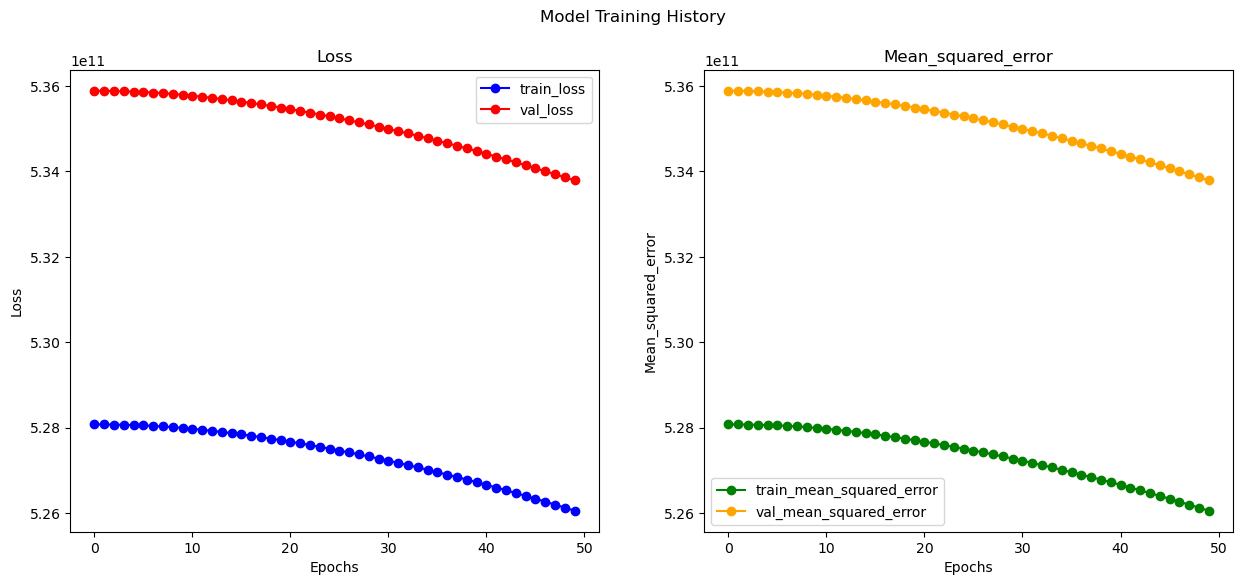

In [209]:
# Plot the training and validation accuracy over epochs
plot_history(history, metric='mean_squared_error')

### Model 2

In [210]:
model2 = build_basic_model(input_dimension, first_layer_neurons=200)

#fit the model using the function
history = train_model(model2, X_train_pca, X_test_pca, epochs=30, batch_size=32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 200)               3400      
                                                                 
 dense_6 (Dense)             (None, 1)                 201       
                                                                 
Total params: 3,601
Trainable params: 3,601
Non-trainable params: 0
_________________________________________________________________


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/30
116/116 [==============================] - 1s 3ms/step - loss: 528073129984.0000 - mean_absolute_error: 662331.8750 - mean_squared_error: 528073129984.0000 - mean_squared_logarithmic_error: 144.3073 - val_loss: 535881482240.0000 - val_mean_absolute_error: 670384.2500 - val_mean_squared_error: 535881482240.0000 - val_mean_squared_logarithmic_error: 123.5446
Epoch 2/30
116/116 [==============================] - 0s 2ms/step - loss: 528051372032.0000 - mean_absolute_error: 662317.0625 - mean_squared_error: 528051372032.0000 - mean_squared_logarithmic_error: 110.1613 - val_loss: 535846420480.0000 - val_mean_absolute_error: 670361.5000 - val_mean_squared_error: 535846420480.0000 - val_mean_squared_logarithmic_error: 98.9083
Epoch 3/30
116/116 [==============================] - 0s 2ms/step - loss: 528001138688.0000 - mean_absolute_error: 662284.4375 - mean_squared_error: 528001138688.0000 - mean_squared_logarithmic_error: 90.5951 - val_loss: 535778164736.0000 - val_mean_absolute_er

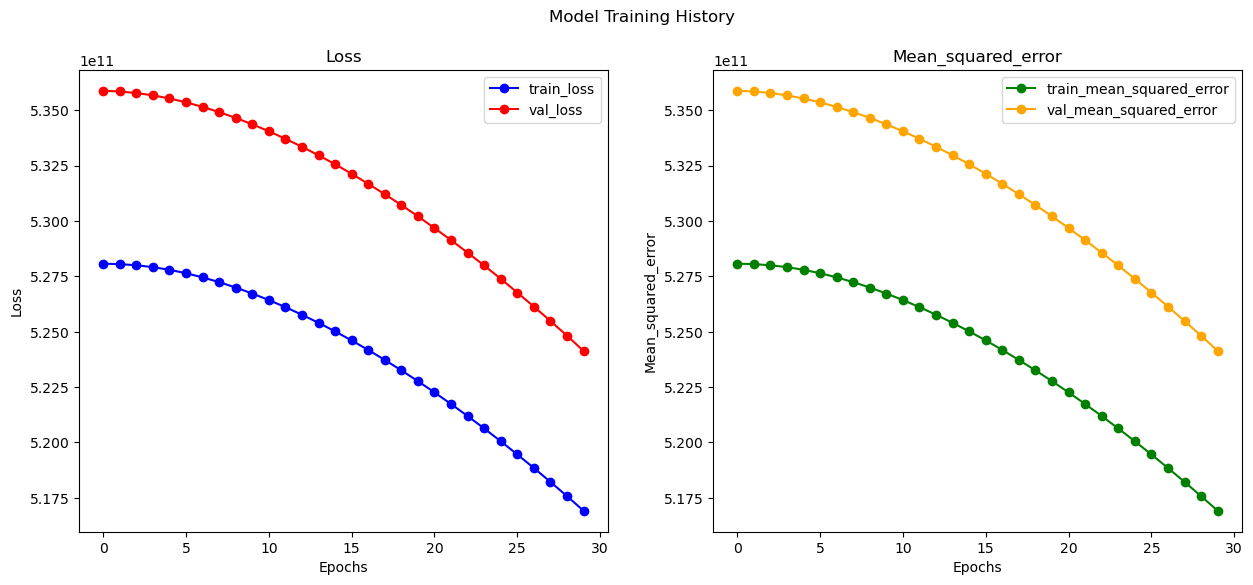

In [211]:
# Plot the training and validation accuracy over epochs
plot_history(history, metric='mean_squared_error')

39/39 [==============================] - 0s 787us/step
Training Set Metrics:
Mean Absolute Error (MAE): 655230.1148867314
Mean Squared Error (MSE): 516574787866.2006
Root Mean Squared Error (RMSE): 718731.3739264488
R-squared (R²): -4.778871526507075

Test Set Metrics:
Mean Absolute Error (MAE): 663165.8066343042
Mean Squared Error (MSE): 524133469419.84064
Root Mean Squared Error (RMSE): 723970.6274565569
R-squared (R²): -5.061638241197869


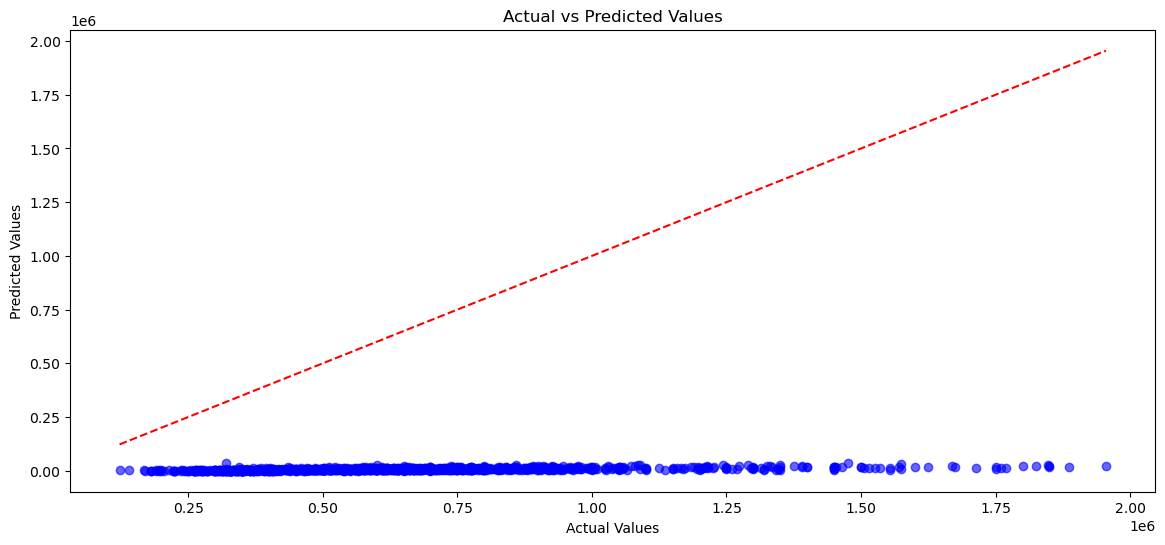

{'train_mae': 655230.1148867314,
 'train_mse': 516574787866.2006,
 'train_rmse': 718731.3739264488,
 'train_r2': -4.778871526507075,
 'test_mae': 663165.8066343042,
 'test_mse': 524133469419.84064,
 'test_rmse': 723970.6274565569,
 'test_r2': -5.061638241197869}

In [212]:
evaluate_model(model2, X_train_pca, y_train, X_test_pca, y_test)

In [213]:
df2.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.20,47.34
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.36,47.51
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.16,47.44
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.37,47.57
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.18,47.73


### Model 3

In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



#Create a function to build a model

def build_dropout_model(input_dimension, first_layer_neurons, dropout_rate, optimizer='adam'):
    #validate inpit parameters

    if first_layer_neurons <= 0:
        raise ValueError('Number of neurons must be positive.')

    if not (0 <= dropout_rate < 1):
        raise ValueError('Dropout value should be between 0 and 1')

    #Instantiate the model
    model = Sequential([
        Dense(first_layer_neurons, input_dim=input_dimension, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='linear'),  # Output layer with linear activation for regression
       
      
    ])

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error', 'mean_squared_logarithmic_error'])

    #display model summary
    model.summary()

    #display the neural network
    visualize_nn(model, description=True, figsize=(13,10))

    return model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 200)               3400      
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 3,601
Trainable params: 3,601
Non-trainable params: 0
_________________________________________________________________


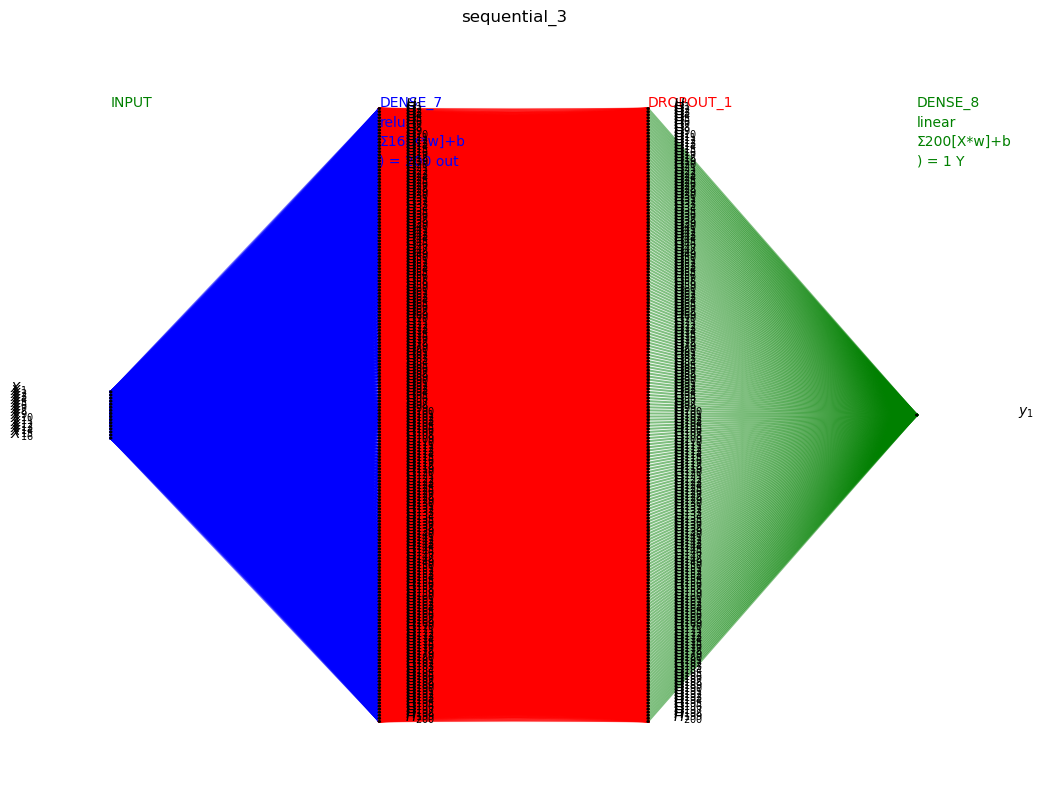

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
116/116 [==============================] - 1s 4ms/step - loss: 528073883648.0000 - mean_absolute_error: 662331.8750 - mean_squared_error: 528073883648.0000 - mean_squared_logarithmic_error: 145.4631 - val_loss: 535883218944.0000 - val_mean_absolute_error: 670385.5625 - val_mean_squared_error: 535883218944.0000 - val_mean_squared_logarithmic_error: 125.8642
Epoch 2/50
116/116 [==============================] - 0s 2ms/step - loss: 528056352768.0000 - mean_absolute_error: 662320.0625 - mean_squared_error: 528056352768.0000 - mean_squared_logarithmic_error: 113.2100 - val_loss: 535856742400.0000 - val_mean_absolute_error: 670367.8125 - val_mean_squared_error: 535856742400.0000 - val_mean_squared_logarithmic_error: 102.5254
Epoch 3/50
116/116 [==============================] - 0s 2ms/step - loss: 528018538496.0000 - mean_absolute_error: 662294.8125 - mean_squared_error: 528018538496.0000 - mean_squared_logarithmic_error: 94.1648 - val_loss: 535805362176.0000 - val_mean_absolute_e

In [215]:
model3 = build_dropout_model(input_dimension, first_layer_neurons=200, dropout_rate=0.50)

history = train_model(model3, X_train_pca, y_train, epochs=50, batch_size=32)# Fit the model using the function

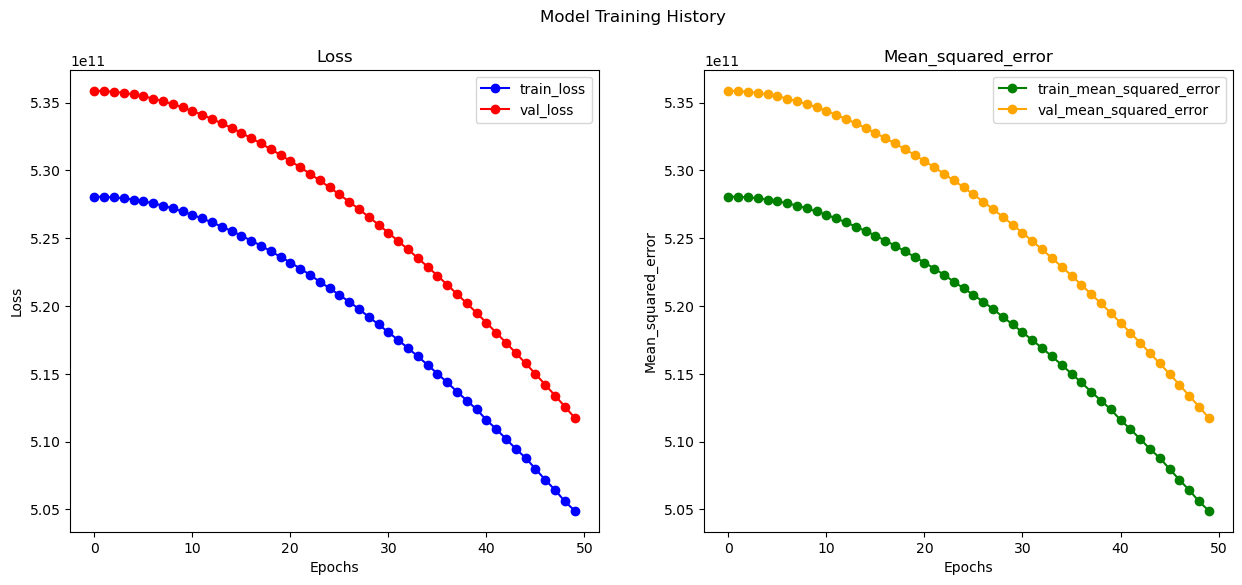

In [216]:
# Plot the training and validation accuracy over epochs
plot_history(history, metric='mean_squared_error')

39/39 [==============================] - 0s 787us/step
Training Set Metrics:
Mean Absolute Error (MAE): 647448.8209277239
Mean Squared Error (MSE): 504436895600.1947
Root Mean Squared Error (RMSE): 710237.2107966427
R-squared (R²): -4.643086115264744

Test Set Metrics:
Mean Absolute Error (MAE): 655295.8851132686
Mean Squared Error (MSE): 511760907792.90936
Root Mean Squared Error (RMSE): 715374.6625320953
R-squared (R²): -4.918548747633571


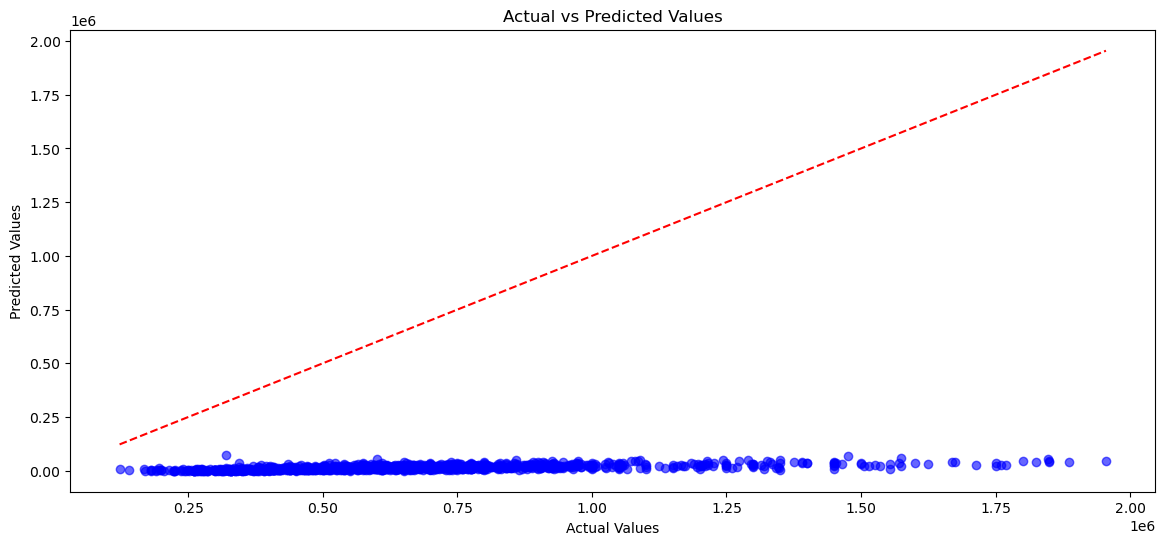

{'train_mae': 647448.8209277239,
 'train_mse': 504436895600.1947,
 'train_rmse': 710237.2107966427,
 'train_r2': -4.643086115264744,
 'test_mae': 655295.8851132686,
 'test_mse': 511760907792.90936,
 'test_rmse': 715374.6625320953,
 'test_r2': -4.918548747633571}

In [217]:
#return the test report
evaluate_model(model3, X_train_pca, y_train, X_test_pca, y_test)

### Model 4

In [218]:
def build_layered_model(input_dimension, first_layer_neurons, second_layer_neurons, dropout_rate, optimizer='adam'):
    #validate inpit parameters

    if first_layer_neurons <= 0:
        raise ValueError('Number of neurons must be positive.')

    if not (0 <= dropout_rate < 1):
        raise ValueError('Dropout value should be between 0 and 1')

    #Instantiate the model
    model = Sequential([
        Dense(first_layer_neurons, input_dim=input_dimension, activation='relu'),
        Dropout(dropout_rate),
        Dense(second_layer_neurons, activation='relu'),  # Additional hidden layer with ReLU and dropout
        Dropout(dropout_rate),
        Dense(1, activation='linear'),  # Output layer with linear activation for regression
    ])

    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error', 'mean_squared_logarithmic_error'])

    #display model summary
    model.summary()

    #display the neural network
    visualize_nn(model, description=True, figsize=(13,10))

    return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                850       
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 20)                1020      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,891
Trainable params: 1,891
Non-trainable params: 0
_________________________________________________________________


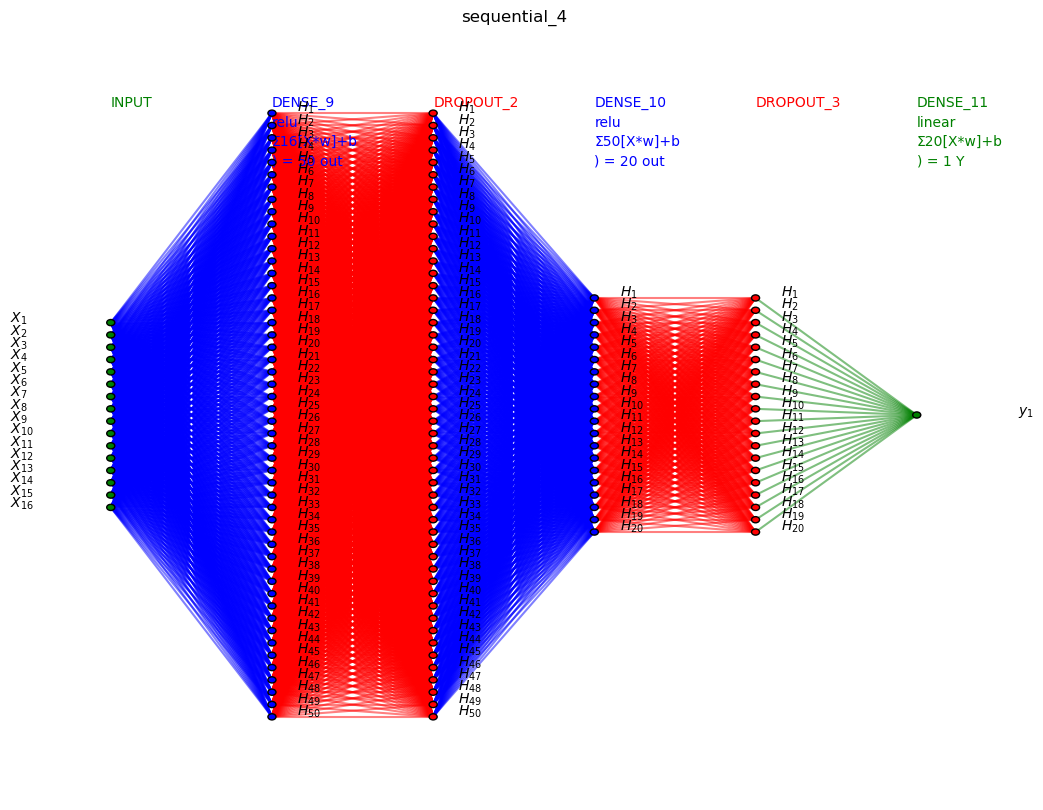

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
116/116 [==============================] - 1s 3ms/step - loss: 528072867840.0000 - mean_absolute_error: 662331.4375 - mean_squared_error: 528072867840.0000 - mean_squared_logarithmic_error: 144.7442 - val_loss: 535879548928.0000 - val_mean_absolute_error: 670383.0000 - val_mean_squared_error: 535879548928.0000 - val_mean_squared_logarithmic_error: 120.0238
Epoch 2/50
116/116 [==============================] - 0s 2ms/step - loss: 528038395904.0000 - mean_absolute_error: 662307.8125 - mean_squared_error: 528038395904.0000 - mean_squared_logarithmic_error: 104.9836 - val_loss: 535815028736.0000 - val_mean_absolute_error: 670339.1875 - val_mean_squared_error: 535815028736.0000 - val_mean_squared_logarithmic_error: 88.0967
Epoch 3/50
116/116 [==============================] - 0s 2ms/step - loss: 527919448064.0000 - mean_absolute_error: 662227.1875 - mean_squared_error: 527919448064.0000 - mean_squared_logarithmic_error: 78.6703 - val_loss: 535620222976.0000 - val_mean_absolute_er

In [219]:
# build and compile the layered model
model4 = build_layered_model(input_dimension, first_layer_neurons=50, second_layer_neurons=20, dropout_rate=0.5)

#fit the model using the function 
history = train_model(model4, X_train_pca, y_train, epochs=50, batch_size=32)

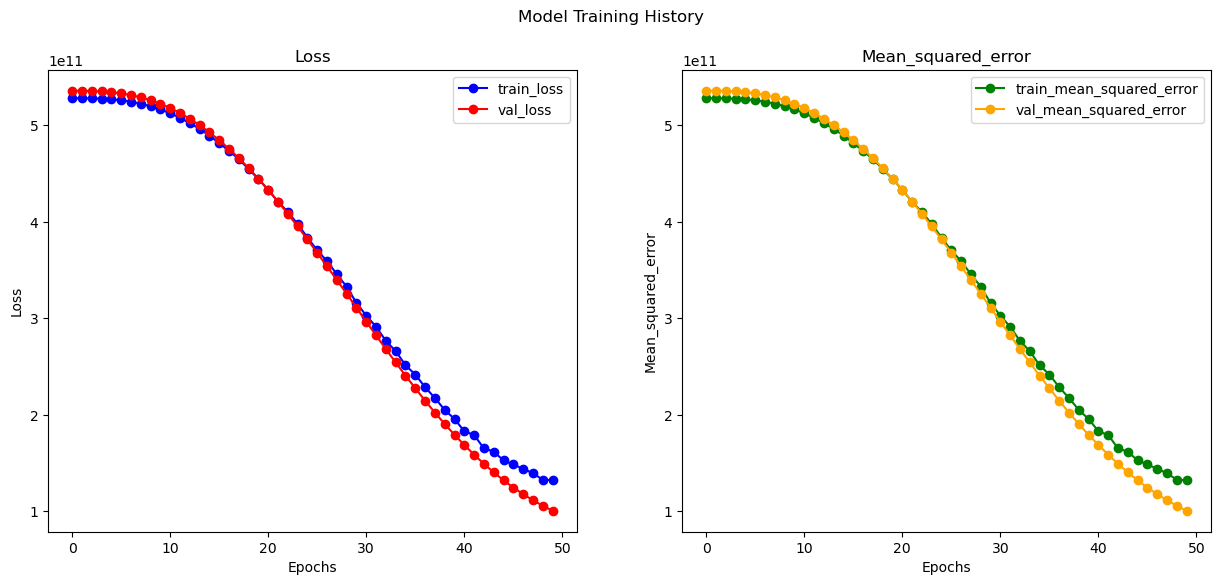

In [220]:
# Plot the training and validation accuracy over epochs
plot_history(history, metric='mean_squared_error')

39/39 [==============================] - 0s 735us/step
Training Set Metrics:
Mean Absolute Error (MAE): 255501.80501618123
Mean Squared Error (MSE): 101878338241.50783
Root Mean Squared Error (RMSE): 319183.86275234504
R-squared (R²): -0.13970298562886496

Test Set Metrics:
Mean Absolute Error (MAE): 255323.23139158575
Mean Squared Error (MSE): 100763037969.54854
Root Mean Squared Error (RMSE): 317431.94226408366
R-squared (R²): -0.1653311988100401


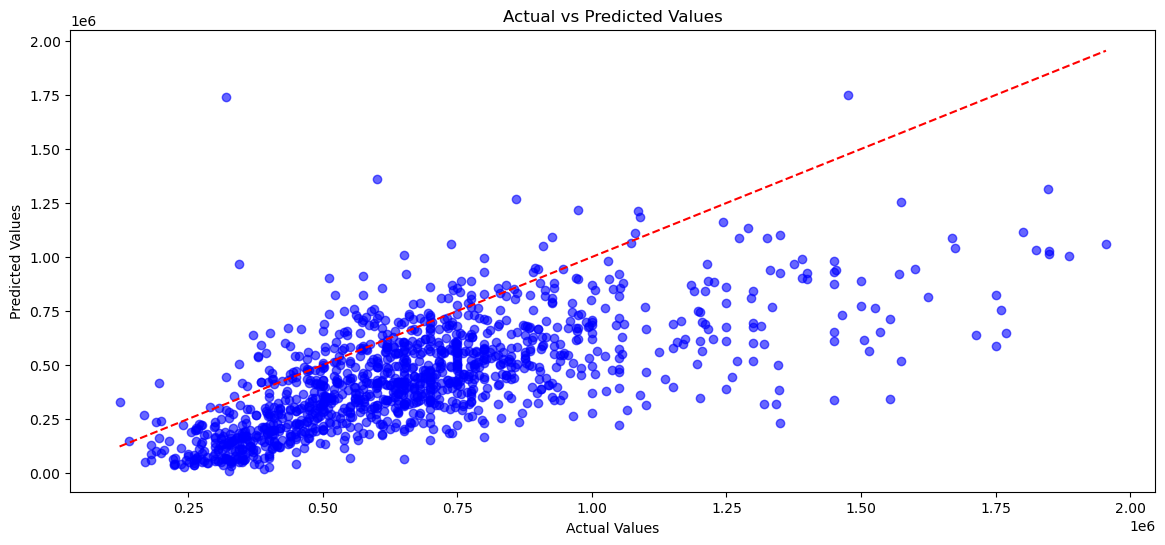

{'train_mae': 255501.80501618123,
 'train_mse': 101878338241.50783,
 'train_rmse': 319183.86275234504,
 'train_r2': -0.13970298562886496,
 'test_mae': 255323.23139158575,
 'test_mse': 100763037969.54854,
 'test_rmse': 317431.94226408366,
 'test_r2': -0.1653311988100401}

In [221]:
#return the test report
evaluate_model(model4, X_train_pca, y_train, X_test_pca, y_test)

# Keras Tuner

In [222]:
# Get layered model function to build a model
def build_layered_model(input_dimension, first_layer_neurons, second_layer_neurons, dropout_rate, optimizer='adam'):
    
    #validate input parameters
    if not isinstance(input_dimension, int) or input_dimension <=0:
        raise ValueError('Input neurons must be a positive integer.')
    
    if not isinstance(first_layer_neurons, int) or first_layer_neurons <=0:
        raise ValueError('Number of neurons must be a positive integer.')
    
    if not isinstance(second_layer_neurons, int) or second_layer_neurons <=0:
        raise ValueError('Number of neurons in the second layer must be a positive integer.')
    
    if not isinstance(dropout_rate, float) or not ((0 <= dropout_rate < 1)):
        raise ValueError('Dropout rate must be a float between 0 and 1.')
    
    
    #Instantiate the model
    model = Sequential([
        Dense(first_layer_neurons, input_dim=input_dimension, activation='relu'),
        Dropout(dropout_rate),
        Dense(second_layer_neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='linear'),
    ])

     # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error', 'mean_squared_logarithmic_error'])

    #display model summary
    model.summary()

    #display the neural network
    visualize_nn(model, description=True, figsize=(13,10))

    return model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 70)                1190      
                                                                 
 dropout_4 (Dropout)         (None, 70)                0         
                                                                 
 dense_13 (Dense)            (None, 35)                2485      
                                                                 
 dropout_5 (Dropout)         (None, 35)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 36        
                                                                 
Total params: 3,711
Trainable params: 3,711
Non-trainable params: 0
_________________________________________________________________


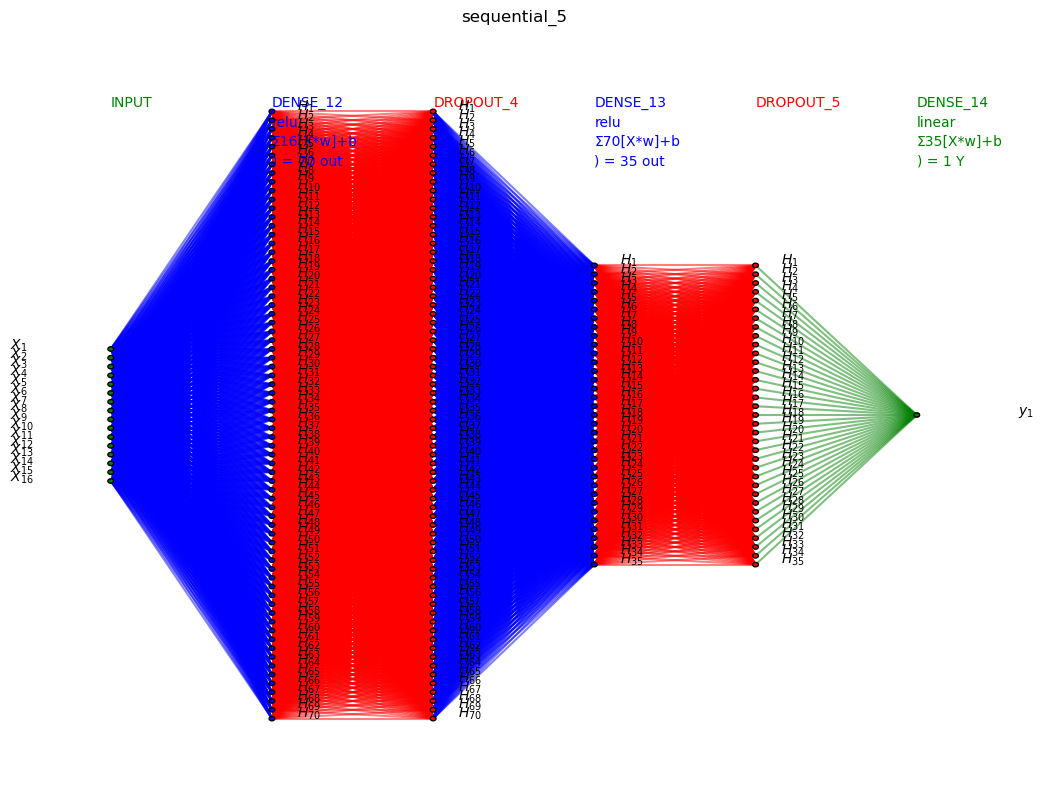

In [223]:
#build and compile model
layered_model = build_layered_model(input_dimension, first_layer_neurons=70, second_layer_neurons=35, dropout_rate=0.5)

### Advanced Model Tuning

In [234]:
# create a function to build and compile a demo model for hyperparameter tuning 
def advanced_tuning_model(hp):

    #Replace this model with any from above
    model = Sequential([
        Dense(17, input_dim=input_dimension, activation='relu'),
        Dense(units=hp.Int('units', min_value=10, max_value=50, step=5), activation='relu'),
        Dropout(hp.Float(name='dropout_value', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(1, activation='linear')
    ])


    model.compile(
        optimizer=hp.Choice('optimizer', ['rmsprop', 'nadam', 'adam']),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error',]
    )

    return model

In [235]:
folder_name = 'KerasTuner'
try:
    os.makedirs(folder_name, exist_ok=True)
    print(f"Directory '{folder_name}' created successfully")
except Exception as e:
    print(f"Error creating directory '{folder_name}': {e}")

Directory 'KerasTuner' created successfully


In [236]:
# Define advanced tuner
tuner = kt.Hyperband(
    advanced_tuning_model,
    objective='mean_absolute_error',
    max_epochs=100,
    hyperband_iterations=2,
    overwrite=True,
    seed=42,
    project_name='advanced_tuner',
    directory=folder_name
)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [237]:
# Define number of epochs to use
epochs = 100
# Run the advanced tuner
tuner.search(X_train_pca, y_train,
             epochs=epochs, 
             validation_data=(X_test_pca, y_test),
             callbacks=[early_stopping])

Trial 172 Complete [00h 00m 02s]
mean_absolute_error: 661921.75

Best mean_absolute_error So Far: 156043.390625
Total elapsed time: 00h 06m 28s
INFO:tensorflow:Oracle triggered exit


In [238]:
# Obtain the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print('Best Hyperparameters:', best_hps.values)

Best Hyperparameters: {'units': 50, 'dropout_value': 0.0, 'optimizer': 'adam', 'tuner/epochs': 100, 'tuner/initial_epoch': 34, 'tuner/bracket': 4, 'tuner/round': 4, 'tuner/trial_id': '0144'}


In [239]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                289       
                                                                 
 dense_1 (Dense)             (None, 50)                900       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,240
Trainable params: 1,240
Non-trainable params: 0
_________________________________________________________________


In [240]:
# Evaluate the best model
result = best_model.evaluate(X_test_pca, y_test, return_dict=True)
print('Evaluation Result:', result)

39/39 [==============================] - 0s 840us/step - loss: 47846871040.0000 - mean_absolute_error: 152778.4844 - mean_squared_error: 47846871040.0000
Evaluation Result: {'loss': 47846871040.0, 'mean_absolute_error': 152778.484375, 'mean_squared_error': 47846871040.0}


In [241]:
# Inspect results in more detail
tuner.results_summary(5)

Results summary
Results in KerasTuner\advanced_tuner
Showing 5 best trials
Objective(name="mean_absolute_error", direction="min")

Trial 0146 summary
Hyperparameters:
units: 50
dropout_value: 0.0
optimizer: adam
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0144
Score: 156043.390625

Trial 0147 summary
Hyperparameters:
units: 50
dropout_value: 0.0
optimizer: nadam
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0143
Score: 156274.03125

Trial 0144 summary
Hyperparameters:
units: 50
dropout_value: 0.0
optimizer: adam
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: 0134
Score: 415263.625

Trial 0143 summary
Hyperparameters:
units: 50
dropout_value: 0.0
optimizer: nadam
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: 0132
Score: 421093.9375

Trial 0142 summary
Hyperparameters:
units: 50
dropout_value: 0.1
optimizer: nadam
t

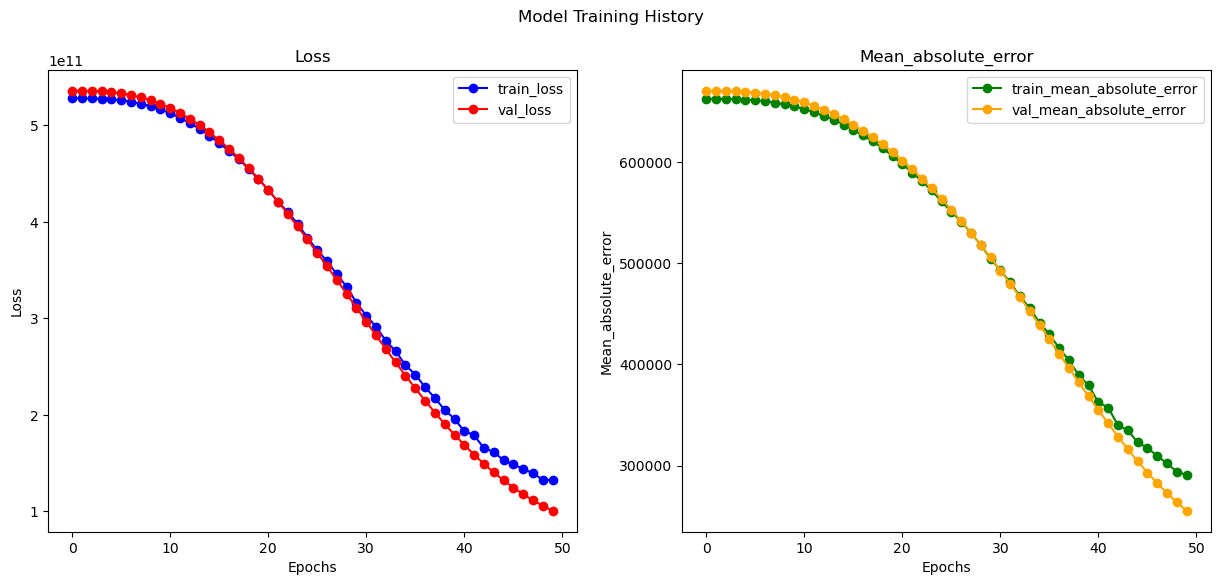

In [242]:
#Plot the training and validation accuracy over epochs
plot_history(history, metric='mean_absolute_error')

39/39 [==============================] - 0s 748us/step
Training Set Metrics:
Mean Absolute Error (MAE): 156007.37405609494
Mean Squared Error (MSE): 48953532183.25755
Root Mean Squared Error (RMSE): 221254.4512168231
R-squared (R²): 0.4523616330089876

Test Set Metrics:
Mean Absolute Error (MAE): 152778.50161812297
Mean Squared Error (MSE): 47846869641.61165
Root Mean Squared Error (RMSE): 218739.2732035371
R-squared (R²): 0.44664778789602


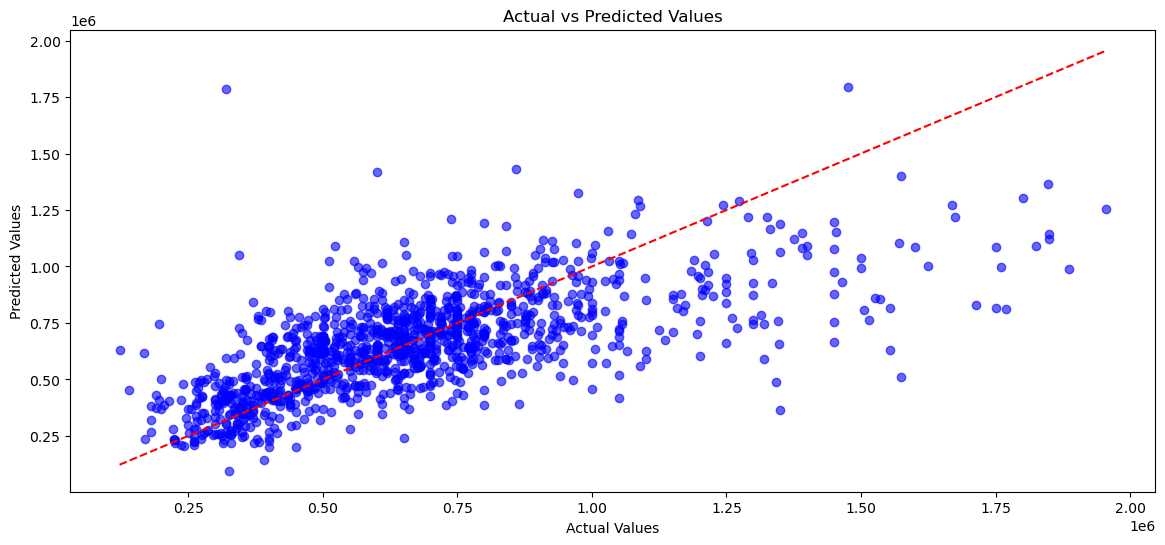

{'train_mae': 156007.37405609494,
 'train_mse': 48953532183.25755,
 'train_rmse': 221254.4512168231,
 'train_r2': 0.4523616330089876,
 'test_mae': 152778.50161812297,
 'test_mse': 47846869641.61165,
 'test_rmse': 218739.2732035371,
 'test_r2': 0.44664778789602}

In [243]:
evaluate_model(best_model, X_train_pca, y_train, X_test_pca, y_test)